In [20]:
import cv2
import imutils
import matplotlib.pyplot as plt
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, binary_dilation, square
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from matplotlib.patches import Rectangle
from skimage import measure
import numpy as np
from skimage.morphology import skeletonize, thin
from scipy.spatial.distance import euclidean
from os import listdir
from os.path import isfile, join
import os
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage.filters import threshold_otsu
from skimage import feature
import uuid

In [18]:
dir_parts = r'D:\imageRecognition\fecredit\image parts'
dir_raw = r'D:\imageRecognition\fecredit\fecredit'

onlyfiles = [f for f in listdir(dir_raw) if isfile(join(dir_raw, f))]

In [629]:
onlyfiles

['04GSN.jfif',
 '0LFSM.jfif',
 '0LGS7.jfif',
 '0LGSN.jfif',
 '0LYS6.jfif',
 '1C7JW.jfif',
 '1C8JD.jfif',
 '1D8KE.jfif',
 '1T8JE.jfif',
 '2D9KX.jfif',
 '2D9KX.jpg',
 '2DQKX.jfif',
 '2DQKX.jpg',
 '2E9LX.jfif',
 '2U93F.jfif',
 '2U9KE.jfif',
 '2U9KF.jfif',
 '2US71.jpg',
 '2V93F.jfif',
 '3E9LF.jfif',
 '3EOLY.jfif',
 '3EOLY.jpg',
 '3ERLX.jpg',
 '3F0MG.jfif',
 '3FOLY.jfif',
 '3FOMG.jfif',
 '3FOMY.jfif',
 '3V04G.jfif',
 '3VOLG.png',
 '3VOM2.jpg',
 '3VOMG.jfif',
 '42U9K.jfif',
 '4F0MY.jpg',
 '4FSM1.jfif',
 '4GSN1.jfif',
 '4IU93.jfif',
 '4IUO3.jfif',
 '4W05G.jpg',
 '4WAMH.jfif',
 '4WANH.jfif',
 '5GAN2.jfif',
 '5GBNH.jfif',
 '5GT9L.jfif',
 '5GTN2.jfif',
 '5HBN2.jpg',
 '5HBOI.jfif',
 '5HTN2.jfif',
 '5HTO2.jfif',
 '5XA6H.jfif',
 '5XANH.jfif',
 '5XB6I.jfif',
 '5XB93.jfif',
 '5YBO.jpg',
 '6CAMH.jfif',
 '6HBOI.jfif',
 '6HCO3.jfif',
 '6HU03.jpg',
 '6HUO3.jfif',
 '6ICO3.jfif',
 '6ICP3.jfif',
 '6YB7I.jfif',
 '71XA6.jfif',
 '72D8K.jpg',
 '72DQK.jfif',
 '7ICPJ.jfif',
 '7IDPJ.jfif',
 '7JDQ4.jfif',
 '7JVQ4.j

In [630]:
len(onlyfiles)

291

In [19]:
for x in onlyfiles[:2]:
    image = cv2.imread(os.path.join(dir_parts,x))
    print(image.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [614]:
len(onlyfiles)

9955

In [631]:
onlyfiles[:3]

['04GSN.jfif', '0LFSM.jfif', '0LGS7.jfif']

04GSN.jfif
letters= 5
contours= 8
lst_countours_clean= 5


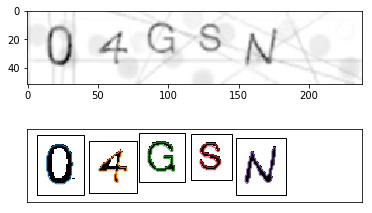

0LFSM.jfif
letters= 5
contours= 7
lst_countours_clean= 5


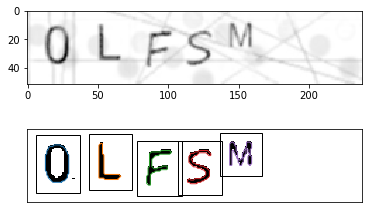

0LGS7.jfif
letters= 5
contours= 8
lst_countours_clean= 5


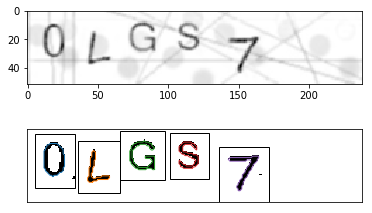

0LGSN.jfif
letters= 5
contours= 13
lst_countours_clean= 5


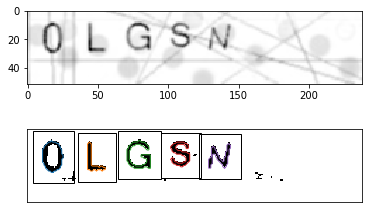

0LYS6.jfif
letters= 5
contours= 10
lst_countours_clean= 5


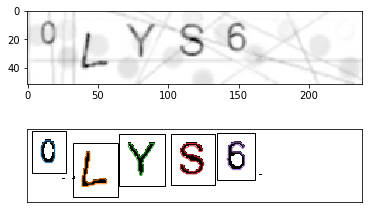

1C7JW.jfif
letters= 5
contours= 8
lst_countours_clean= 5


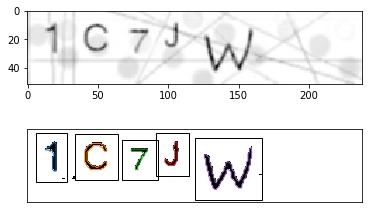

1C8JD.jfif
letters= 5
contours= 10
lst_countours_clean= 5


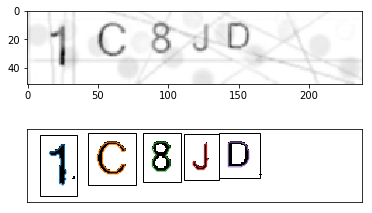

1D8KE.jfif
letters= 5
contours= 11
lst_countours_clean= 5


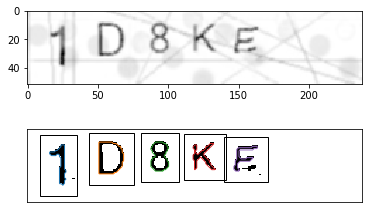

1T8JE.jfif
letters= 5
contours= 10
lst_countours_clean= 5


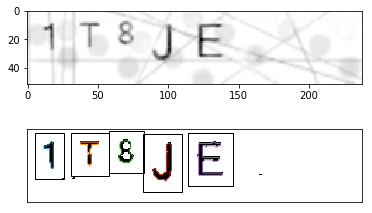

2D9KX.jfif
letters= 5
contours= 8
lst_countours_clean= 5


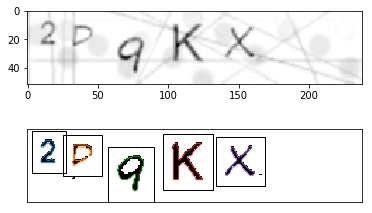

2D9KX.jpg
letters= 5
contours= 10
lst_countours_clean= 5


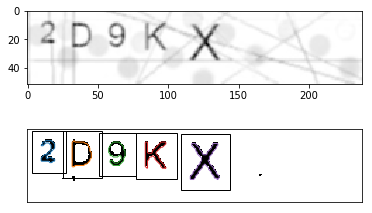

2DQKX.jfif
letters= 5
contours= 7
lst_countours_clean= 5


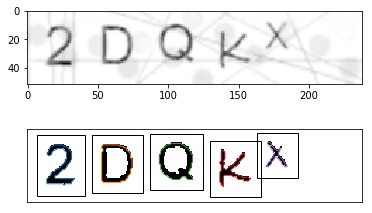

2DQKX.jpg
letters= 5
contours= 9
lst_countours_clean= 5


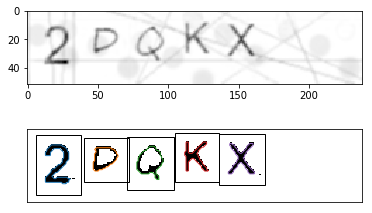

2E9LX.jfif
letters= 5
contours= 8
lst_countours_clean= 5


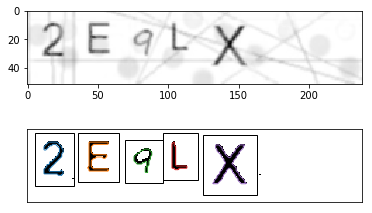

2U93F.jfif
letters= 5
contours= 8
lst_countours_clean= 5


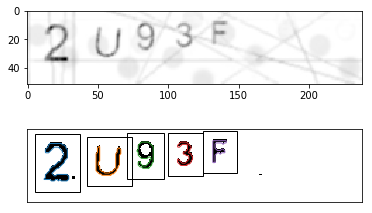

2U9KE.jfif
letters= 5
contours= 6
lst_countours_clean= 5


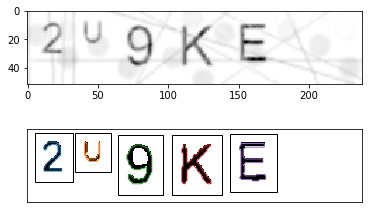

2U9KF.jfif
letters= 5
contours= 9
lst_countours_clean= 5


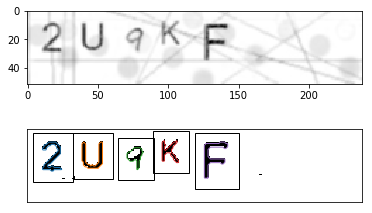

2US71.jpg
letters= 5
contours= 7
lst_countours_clean= 5


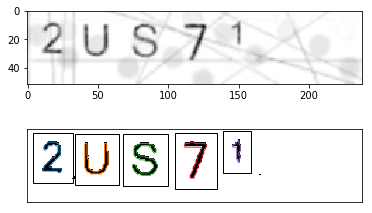

2V93F.jfif
letters= 5
contours= 10
lst_countours_clean= 5


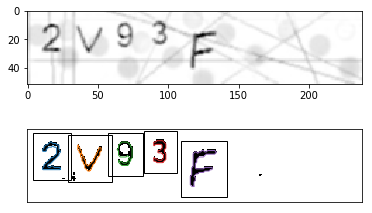

3E9LF.jfif
letters= 5
contours= 7
lst_countours_clean= 5


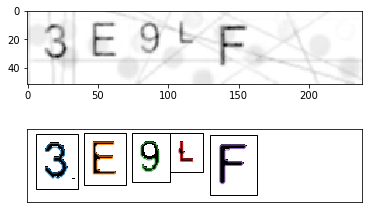

3EOLY.jfif
letters= 5
contours= 8
lst_countours_clean= 5


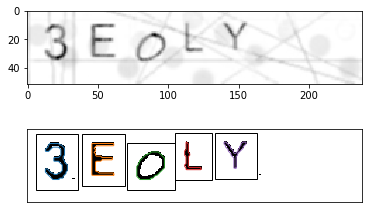

3EOLY.jpg
letters= 5
contours= 6
lst_countours_clean= 5


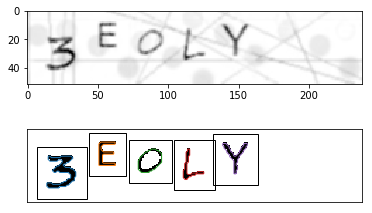

3ERLX.jpg
letters= 5
contours= 9
lst_countours_clean= 5


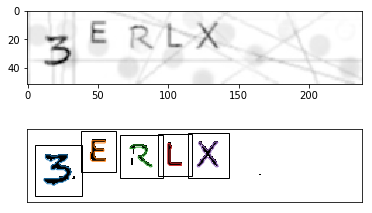

3F0MG.jfif
letters= 5
contours= 12
lst_countours_clean= 5


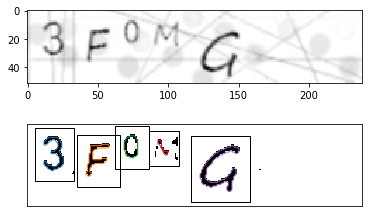

3FOLY.jfif
letters= 5
contours= 9
lst_countours_clean= 5


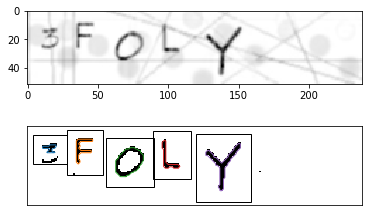

3FOMG.jfif
letters= 5
contours= 8
lst_countours_clean= 5


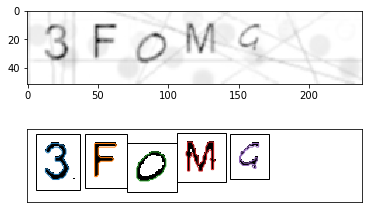

3FOMY.jfif
letters= 5
contours= 9
lst_countours_clean= 5


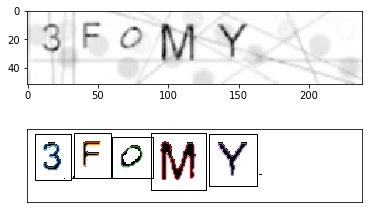

3V04G.jfif
letters= 5
contours= 9
lst_countours_clean= 5


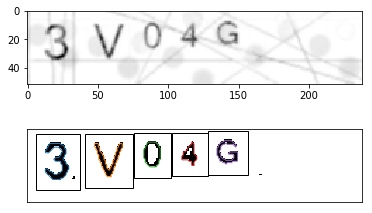

3VOLG.png
letters= 5
contours= 9
lst_countours_clean= 5


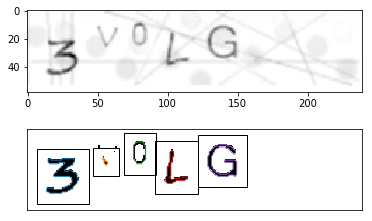

3VOM2.jpg
letters= 5
contours= 9
lst_countours_clean= 5


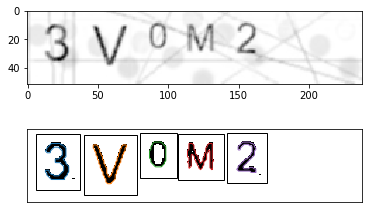

3VOMG.jfif
letters= 5
contours= 6
lst_countours_clean= 5


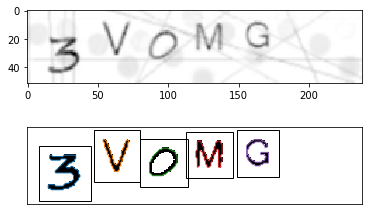

42U9K.jfif
letters= 5
contours= 10
lst_countours_clean= 5


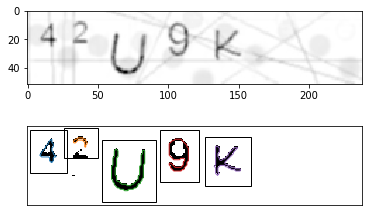

4F0MY.jpg
letters= 5
contours= 7
lst_countours_clean= 5


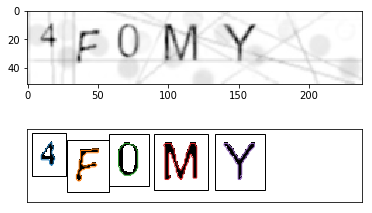

4FSM1.jfif
letters= 5
contours= 6
lst_countours_clean= 5


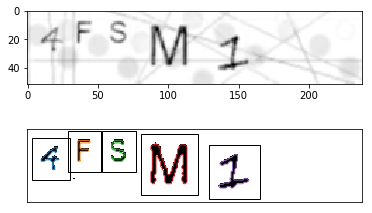

4GSN1.jfif
letters= 5
contours= 9
lst_countours_clean= 5


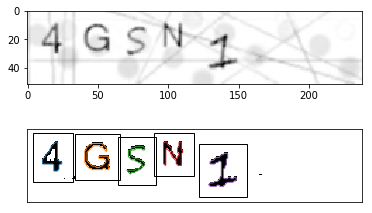

4IU93.jfif
letters= 5
contours= 8
lst_countours_clean= 5


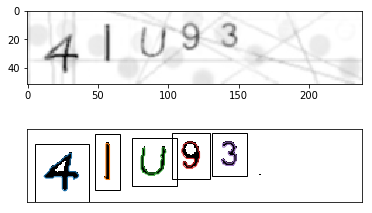

4IUO3.jfif
letters= 5
contours= 10
lst_countours_clean= 5


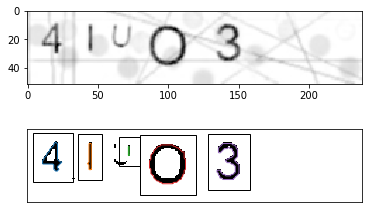

4W05G.jpg
letters= 5
contours= 8
lst_countours_clean= 5


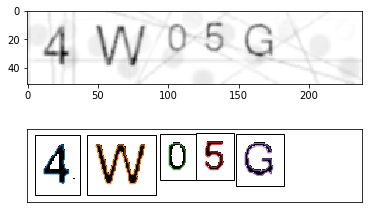

4WAMH.jfif
letters= 5
contours= 10
lst_countours_clean= 5


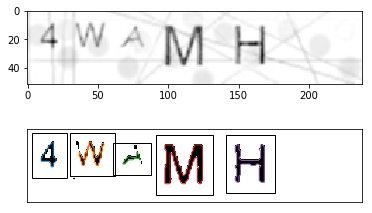

4WANH.jfif
letters= 5
contours= 10
lst_countours_clean= 5


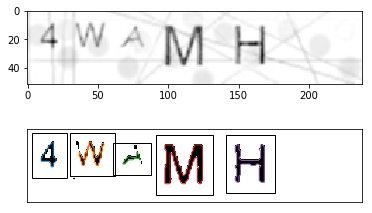

5GAN2.jfif
letters= 5
contours= 10
lst_countours_clean= 5


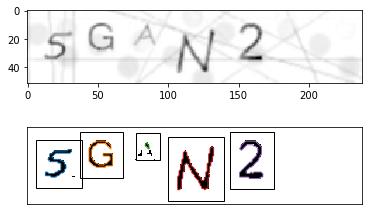

5GBNH.jfif
letters= 5
contours= 8
lst_countours_clean= 5


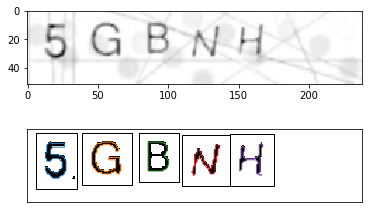

5GT9L.jfif
letters= 5
contours= 8
lst_countours_clean= 5


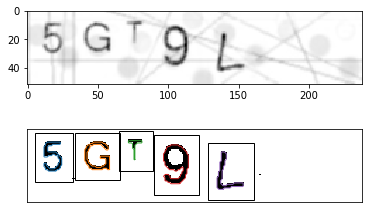

5GTN2.jfif
letters= 5
contours= 8
lst_countours_clean= 5


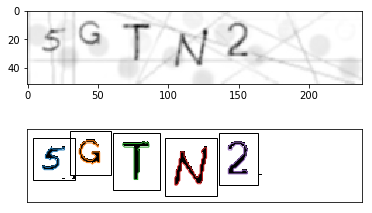

5HBN2.jpg
letters= 5
contours= 7
lst_countours_clean= 5


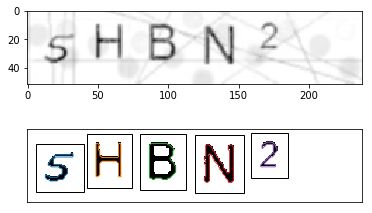

5HBOI.jfif
letters= 5
contours= 8
lst_countours_clean= 5


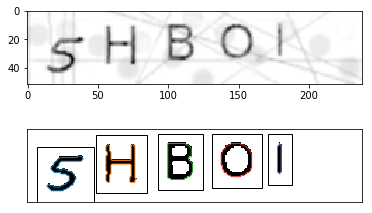

5HTN2.jfif
letters= 5
contours= 6
lst_countours_clean= 5


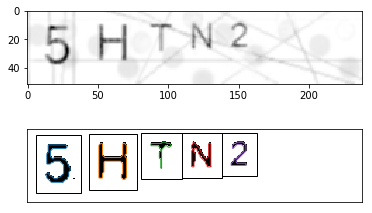

5HTO2.jfif
letters= 5
contours= 8
lst_countours_clean= 5


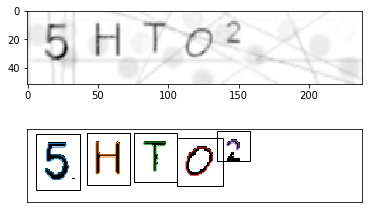

5XA6H.jfif
letters= 5
contours= 9
lst_countours_clean= 5


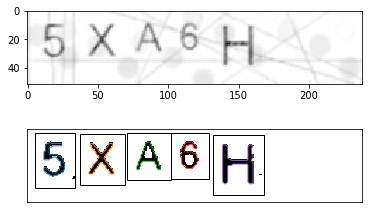

5XANH.jfif
letters= 5
contours= 7
lst_countours_clean= 5


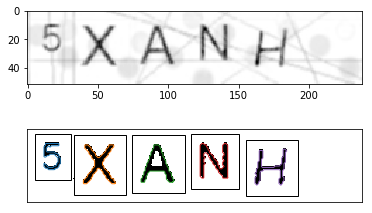

5XB6I.jfif
letters= 5
contours= 9
lst_countours_clean= 5


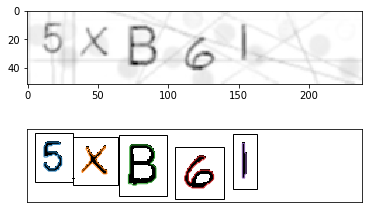

5XB93.jfif
letters= 5
contours= 9
lst_countours_clean= 5


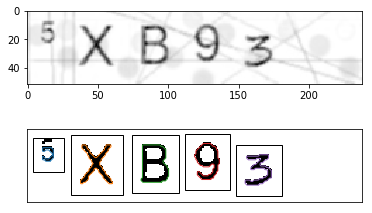

5YBO.jpg
letters= 4
contours= 11
lst_countours_clean= 4


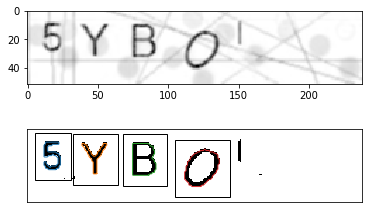

6CAMH.jfif
letters= 5
contours= 8
lst_countours_clean= 5


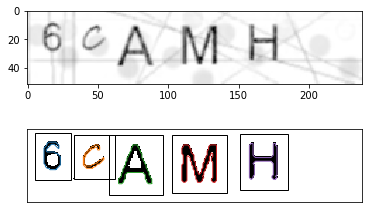

6HBOI.jfif
letters= 5
contours= 9
lst_countours_clean= 5


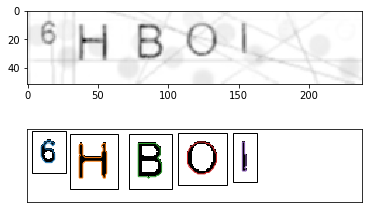

6HCO3.jfif
letters= 5
contours= 10
lst_countours_clean= 5


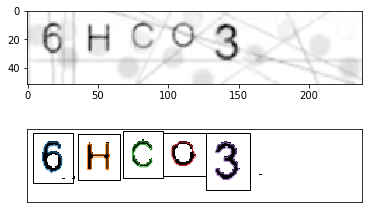

6HU03.jpg
letters= 5
contours= 8
lst_countours_clean= 5


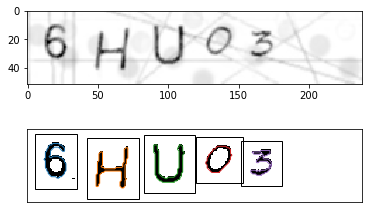

6HUO3.jfif
letters= 5
contours= 9
lst_countours_clean= 5


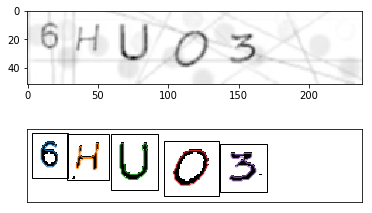

6ICO3.jfif
letters= 5
contours= 9
lst_countours_clean= 5


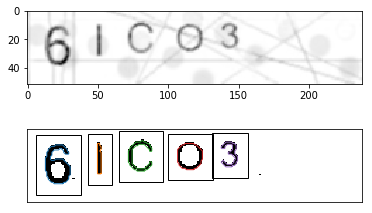

6ICP3.jfif
letters= 5
contours= 8
lst_countours_clean= 5


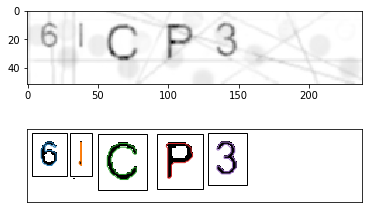

6YB7I.jfif
letters= 5
contours= 10
lst_countours_clean= 5


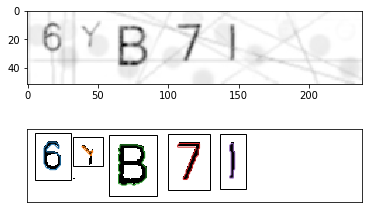

71XA6.jfif
letters= 5
contours= 13
lst_countours_clean= 5


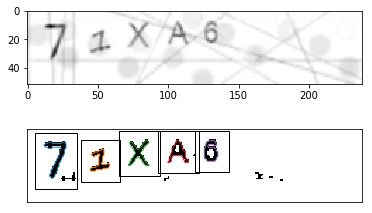

72D8K.jpg
letters= 5
contours= 9
lst_countours_clean= 5


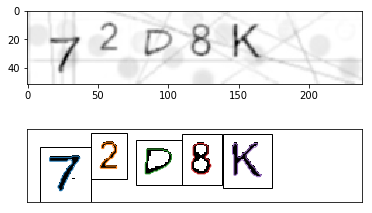

72DQK.jfif
letters= 5
contours= 10
lst_countours_clean= 5


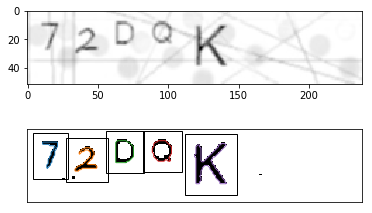

7ICPJ.jfif
letters= 5
contours= 8
lst_countours_clean= 5


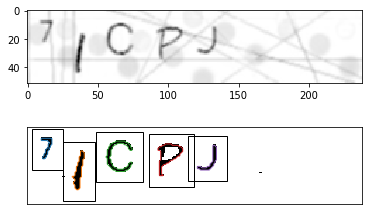

7IDPJ.jfif
letters= 5
contours= 8
lst_countours_clean= 5


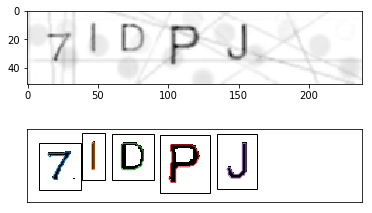

7JDQ4.jfif
letters= 5
contours= 9
lst_countours_clean= 5


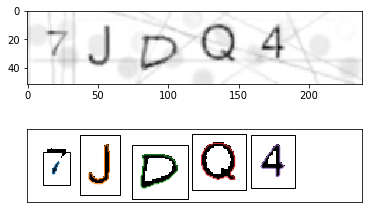

7JVQ4.jfif
letters= 5
contours= 8
lst_countours_clean= 5


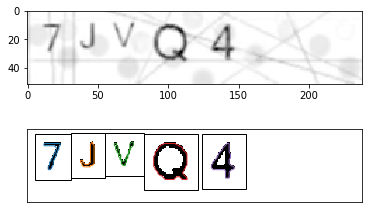

82D9K.jpg
letters= 5
contours= 10
lst_countours_clean= 5


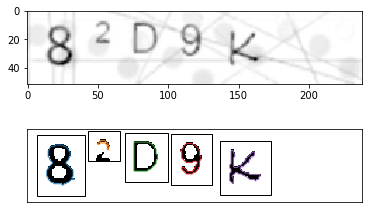

83E9L.jfif
letters= 5
contours= 10
lst_countours_clean= 5


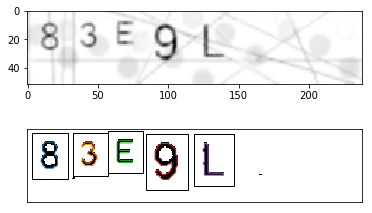

83ERL.jfif
letters= 5
contours= 11
lst_countours_clean= 5


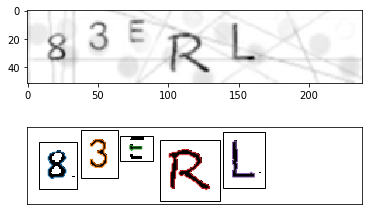

8JEQ5.jfif
letters= 5
contours= 11
lst_countours_clean= 5


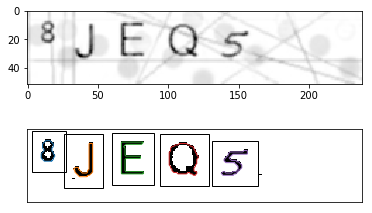

8JWQ5.jfif
letters= 5
contours= 14
lst_countours_clean= 5


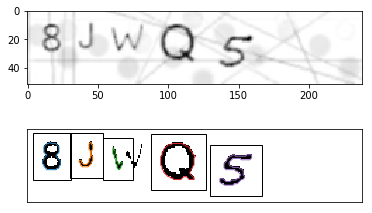

8JWQ5.jpg
letters= 5
contours= 11
lst_countours_clean= 5


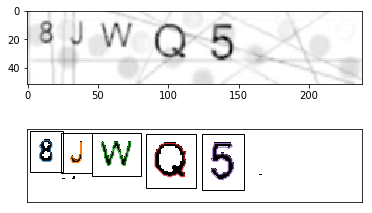

8KEQ5.jfif
letters= 5
contours= 14
lst_countours_clean= 5


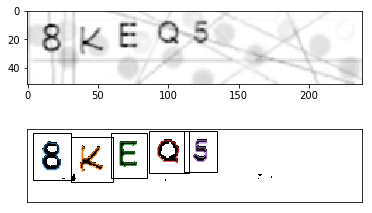

8KEQL.jfif
letters= 5
contours= 10
lst_countours_clean= 5


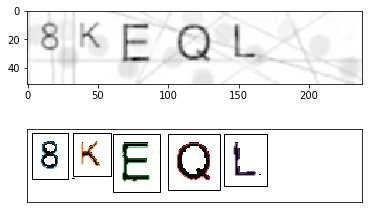

8KER5.jfif
letters= 5
contours= 10
lst_countours_clean= 5


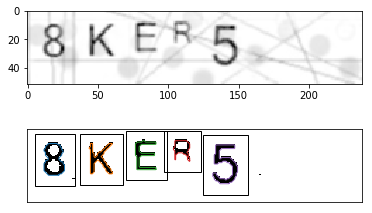

8KER5.png
letters= 5
contours= 10
lst_countours_clean= 5


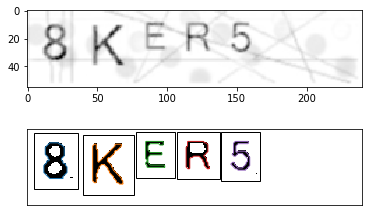

8KERL.jfif
letters= 5
contours= 9
lst_countours_clean= 5


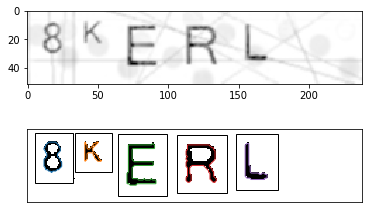

8KICO.jfif
letters= 5
contours= 11
lst_countours_clean= 5


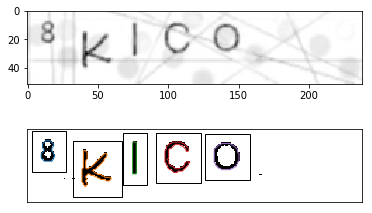

8KWR5.jfif
letters= 5
contours= 8
lst_countours_clean= 5


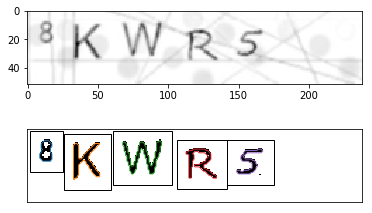

93F0L.jfif
letters= 5
contours= 9
lst_countours_clean= 5


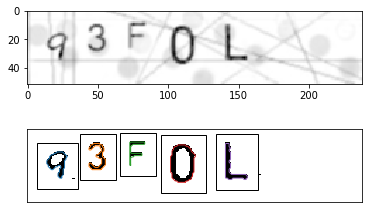

93FRM.jpg
letters= 5
contours= 8
lst_countours_clean= 5


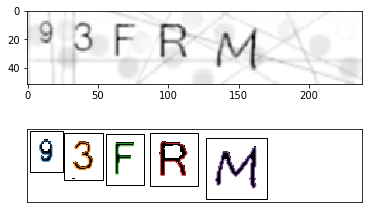

94FSM.jfif
letters= 5
contours= 8
lst_countours_clean= 5


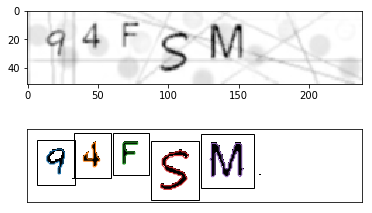

9KER5.jfif
letters= 5
contours= 7
lst_countours_clean= 5


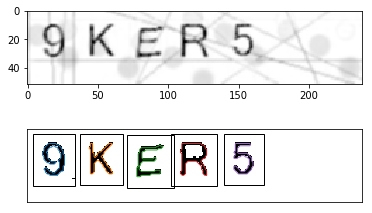

9KFR6.jfif
letters= 5
contours= 10
lst_countours_clean= 5


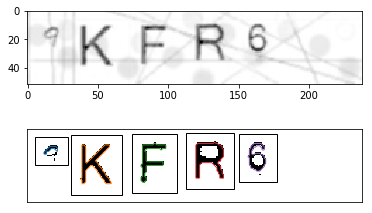

9LFR6.jfif
letters= 5
contours= 9
lst_countours_clean= 5


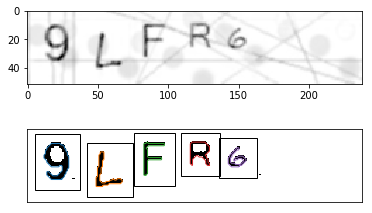

9LFRM.png
letters= 5
contours= 8
lst_countours_clean= 5


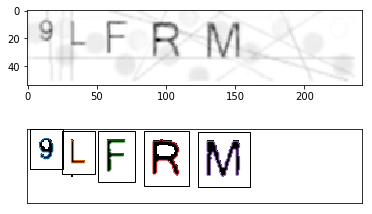

9LXR6.png
letters= 5
contours= 10
lst_countours_clean= 5


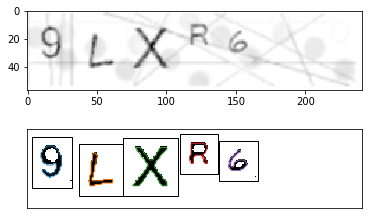

A5GBN.jfif
letters= 5
contours= 11
lst_countours_clean= 5


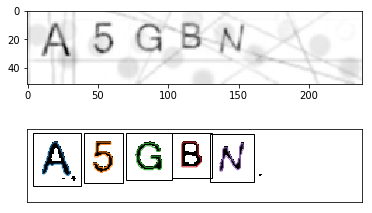

A5HBO.jfif
letters= 5
contours= 10
lst_countours_clean= 5


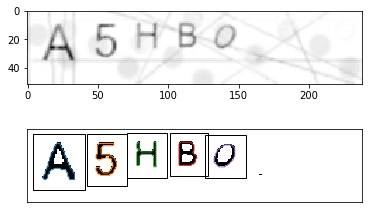

A5HE0.jfif
letters= 5
contours= 8
lst_countours_clean= 5


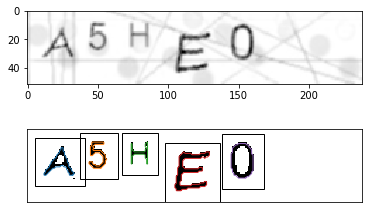

A6HCO.jfif
letters= 5
contours= 10
lst_countours_clean= 5


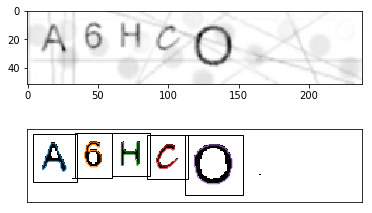

AM1T8.jfif
letters= 5
contours= 15
lst_countours_clean= 5


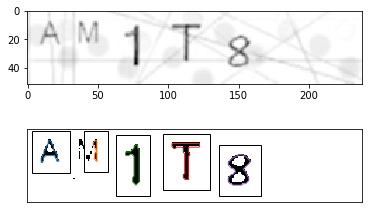

AMHT8.jfif
letters= 5
contours= 7
lst_countours_clean= 5


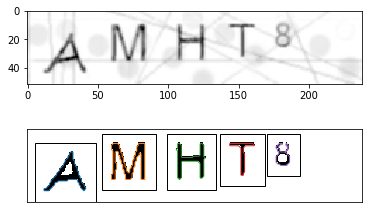

AMHTO.jfif
letters= 5
contours= 7
lst_countours_clean= 5


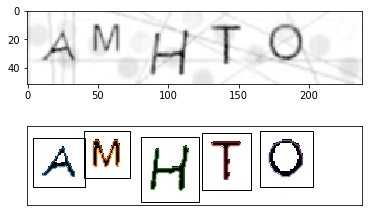

ANHU8.jfif
letters= 5
contours= 7
lst_countours_clean= 5


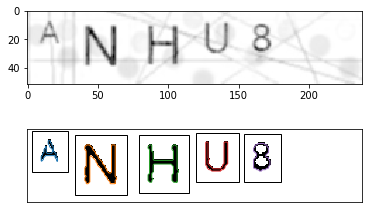

B6ICP.jfif
letters= 5
contours= 14
lst_countours_clean= 5


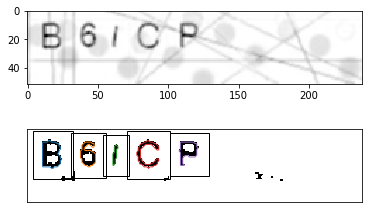

B6IUP.jfif
letters= 5
contours= 12
lst_countours_clean= 5


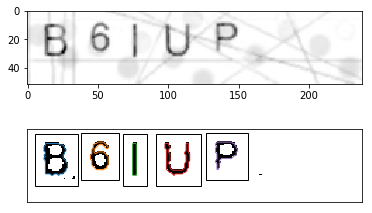

B7IDP.jfif
letters= 5
contours= 11
lst_countours_clean= 5


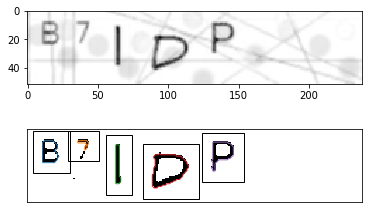

B7IVP.jfif
letters= 5
contours= 8
lst_countours_clean= 5


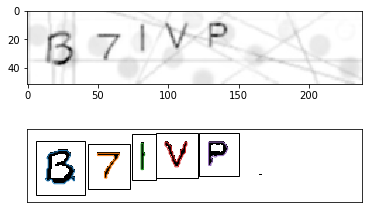

B93F0.jfif
letters= 5
contours= 12
lst_countours_clean= 5


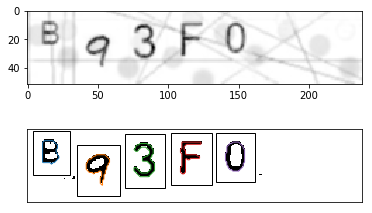

BNHU8.jfif
letters= 5
contours= 9
lst_countours_clean= 5


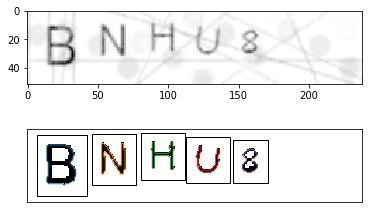

BOIUP.jfif
letters= 5
contours= 11
lst_countours_clean= 5


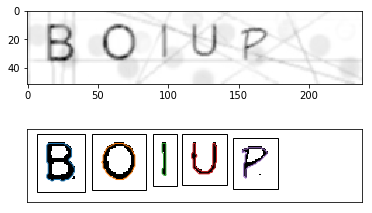

BOIV9.jfif
letters= 5
contours= 8
lst_countours_clean= 5


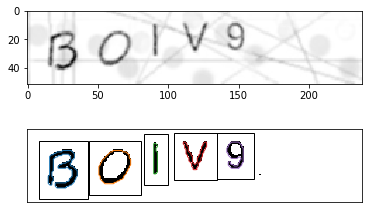

C7IDP.jfif
letters= 5
contours= 8
lst_countours_clean= 5


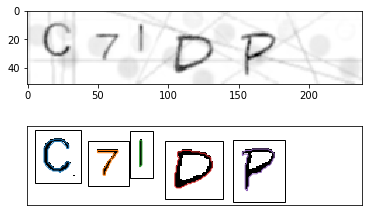

C7JDQ.jfif
letters= 5
contours= 8
lst_countours_clean= 5


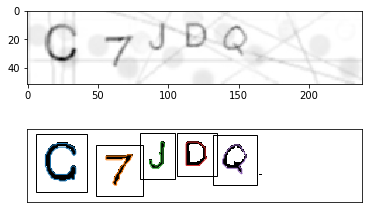

C7JVP.jfif
letters= 5
contours= 8
lst_countours_clean= 5


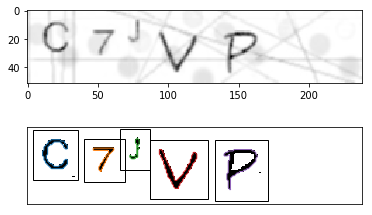

C8JEQ.jfif
letters= 5
contours= 8
lst_countours_clean= 5


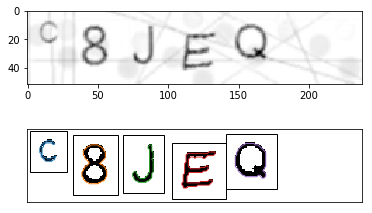

COIGT.jpg
letters= 5
contours= 7
lst_countours_clean= 5


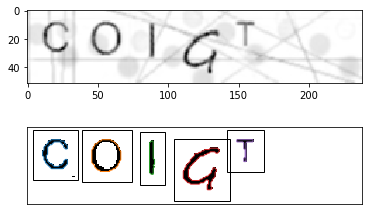

COIVP.jfif
letters= 5
contours= 7
lst_countours_clean= 5


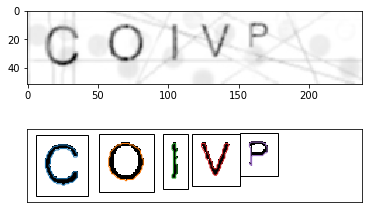

CPJVQ.jfif
letters= 5
contours= 8
lst_countours_clean= 5


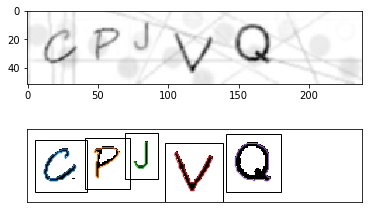

CPJWO.jfif
letters= 5
contours= 9
lst_countours_clean= 5


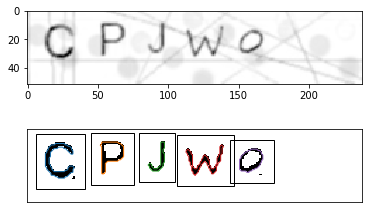

CPJWQ.jfif
letters= 5
contours= 8
lst_countours_clean= 5


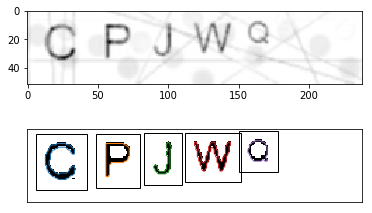

D8JEQ.jfif
letters= 5
contours= 10
lst_countours_clean= 5


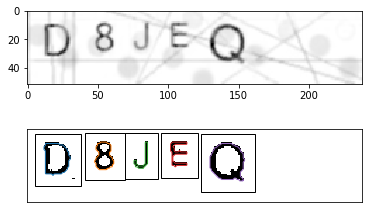

D8KWR.jfif
letters= 5
contours= 9
lst_countours_clean= 5


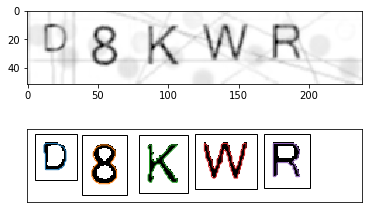

D8KXR.jfif
letters= 5
contours= 8
lst_countours_clean= 5


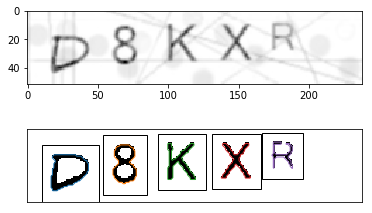

DP4WA.jfif
letters= 5
contours= 15
lst_countours_clean= 5


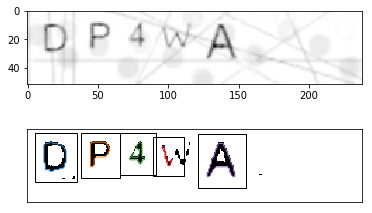

DPJWQ.jfif
letters= 5
contours= 9
lst_countours_clean= 5


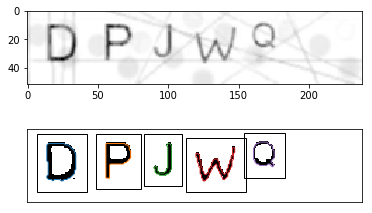

DPKWA.jfif
letters= 5
contours= 11
lst_countours_clean= 5


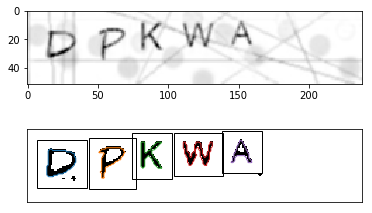

DQKWA.jpg
letters= 5
contours= 13
lst_countours_clean= 5


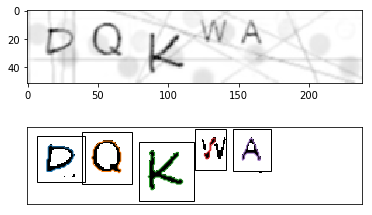

DQKXA.jfif
letters= 5
contours= 8
lst_countours_clean= 5


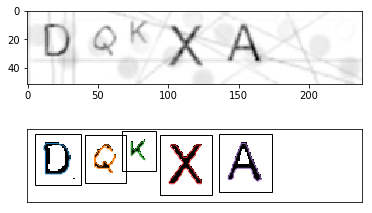

E0LGS.jfif
letters= 5
contours= 6
lst_countours_clean= 5


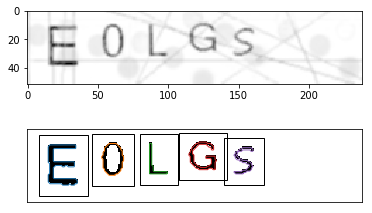

E9LFS.jpg
letters= 5
contours= 8
lst_countours_clean= 5


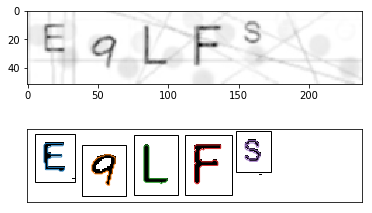

E9LXS.jpg
letters= 5
contours= 5
lst_countours_clean= 5


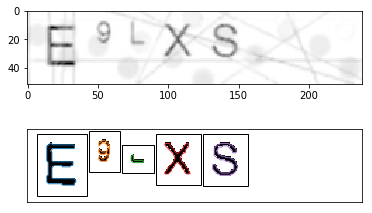

EB7IC.jfif
letters= 5
contours= 5
lst_countours_clean= 5


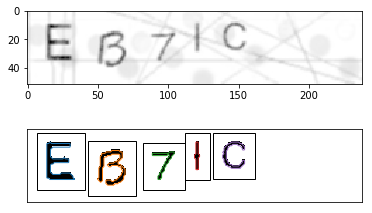

ER5XB.jfif
letters= 5
contours= 9
lst_countours_clean= 5


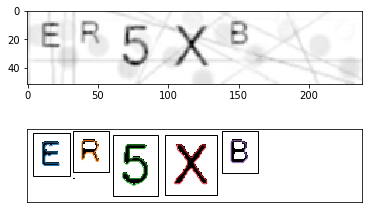

ER5XB.jpg
letters= 5
contours= 9
lst_countours_clean= 5


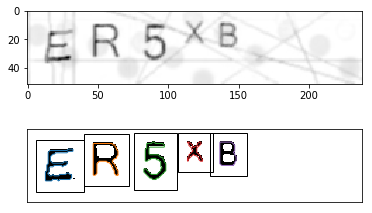

ER5YB.jfif
letters= 5
contours= 11
lst_countours_clean= 5


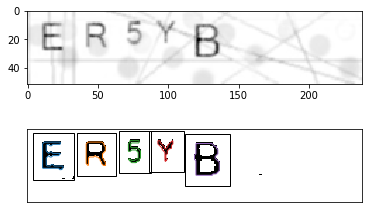

ERLXB.jfif
letters= 5
contours= 9
lst_countours_clean= 5


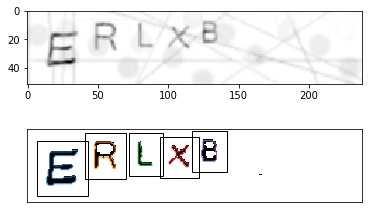

ERLXS.jfif
letters= 5
contours= 9
lst_countours_clean= 5


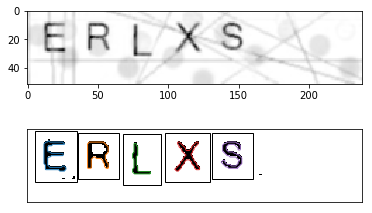

F0MGT.jfif
letters= 5
contours= 10
lst_countours_clean= 5


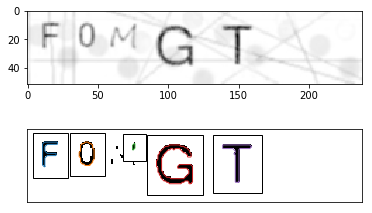

F0MJD.jpg
letters= 5
contours= 11
lst_countours_clean= 5


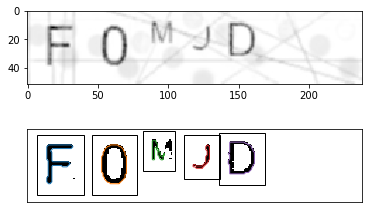

F0MYT.jfif
letters= 5
contours= 11
lst_countours_clean= 5


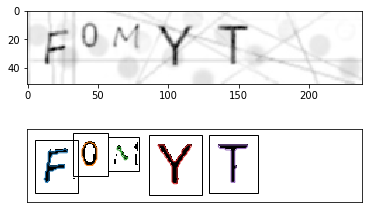

FAMGT.jfif
letters= 5
contours= 9
lst_countours_clean= 5


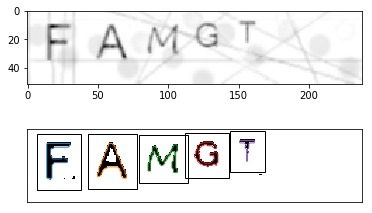

FR6YC.jpg
letters= 5
contours= 8
lst_countours_clean= 5


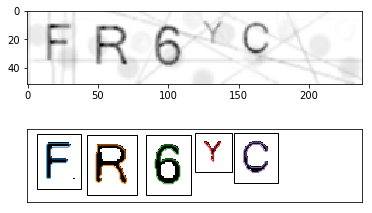

FSM1C.jfif
letters= 5
contours= 8
lst_countours_clean= 5


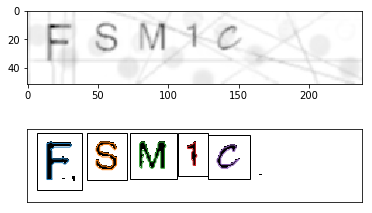

FSMYC.jfif
letters= 5
contours= 7
lst_countours_clean= 5


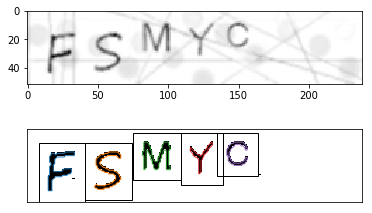

FSMYT.jfif
letters= 5
contours= 11
lst_countours_clean= 5


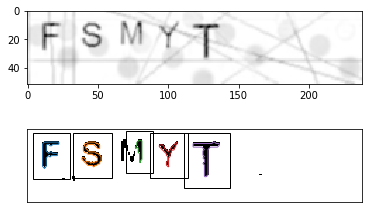

GAM1T.jpg
letters= 5
contours= 7
lst_countours_clean= 5


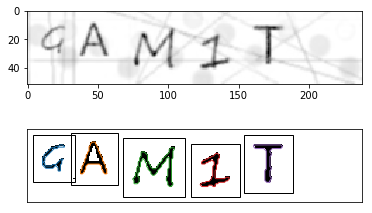

GAN1T.jfif
letters= 5
contours= 6
lst_countours_clean= 5


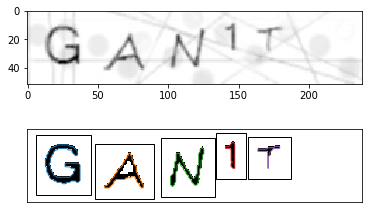

GAN1U.jfif
letters= 5
contours= 6
lst_countours_clean= 5


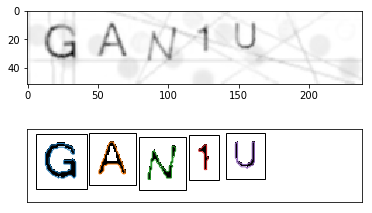

GAN2U.jfif
letters= 5
contours= 6
lst_countours_clean= 5


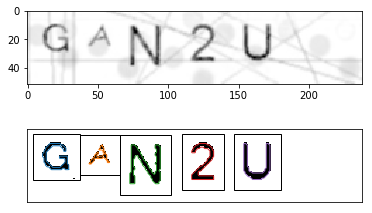

GANHU.jpg
letters= 5
contours= 8
lst_countours_clean= 5


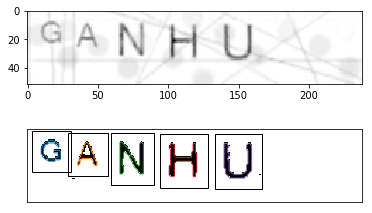

GBN2U.jfif
letters= 5
contours= 5
lst_countours_clean= 5


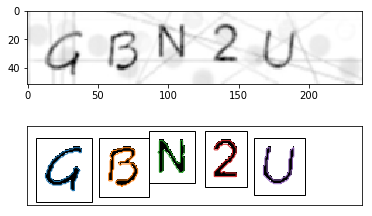

GBNHU.jfif
letters= 5
contours= 7
lst_countours_clean= 5


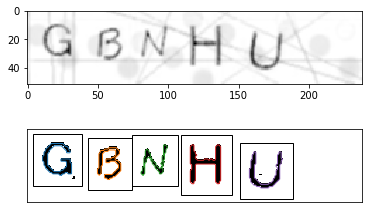

GSM1T.jfif
letters= 5
contours= 7
lst_countours_clean= 5


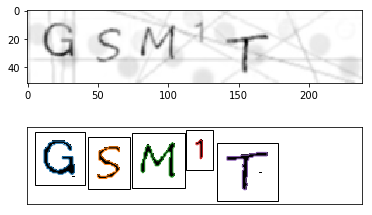

GT71D.jpg
letters= 5
contours= 7
lst_countours_clean= 5


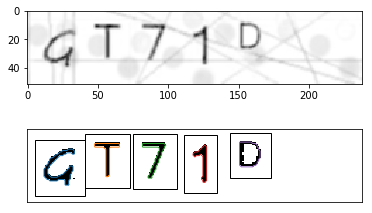

GTN1U.jfif
letters= 5
contours= 6
lst_countours_clean= 5


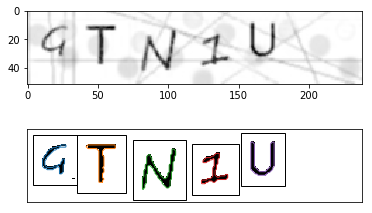

GTN2D.jfif
letters= 5
contours= 6
lst_countours_clean= 5


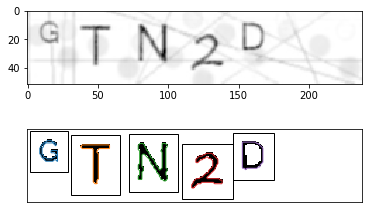

GTN2U.jfif
letters= 5
contours= 6
lst_countours_clean= 5


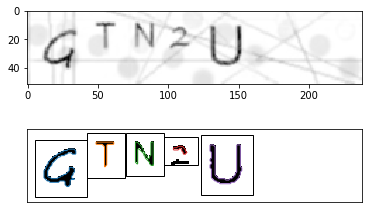

GTQLX.jfif
letters= 5
contours= 7
lst_countours_clean= 5


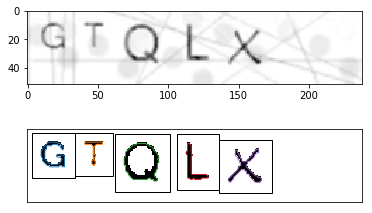

HBNIU.jfif
letters= 5
contours= 13
lst_countours_clean= 5


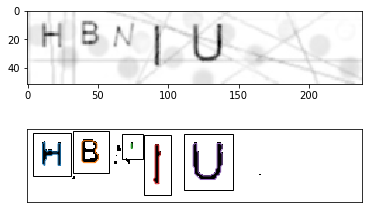

HBOIV.jfif
letters= 5
contours= 11
lst_countours_clean= 5


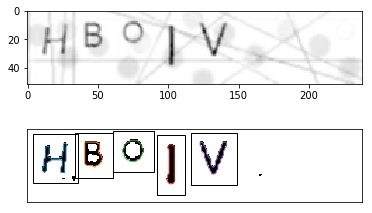

HEOLG.jpg
letters= 5
contours= 7
lst_countours_clean= 5


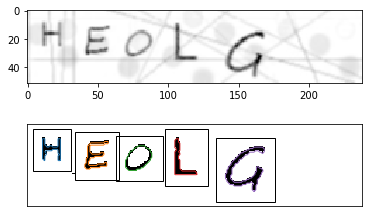

HT82E.jfif
letters= 5
contours= 6
lst_countours_clean= 5


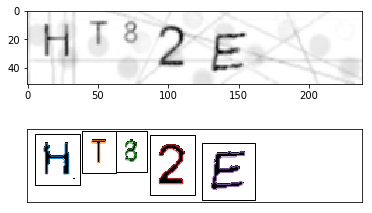

HTO2E.jfif
letters= 5
contours= 7
lst_countours_clean= 5


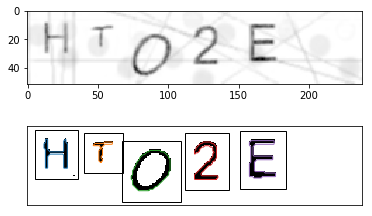

HU82E.jfif
letters= 5
contours= 11
lst_countours_clean= 5


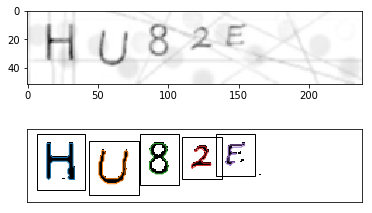

HV0LG.jfif
letters= 5
contours= 6
lst_countours_clean= 5


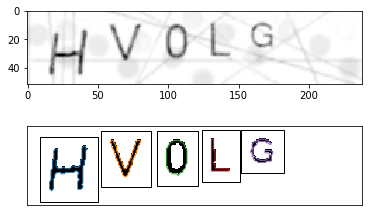

ICOJV.jfif
letters= 5
contours= 8
lst_countours_clean= 5


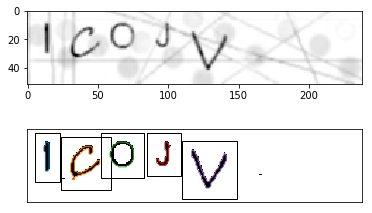

ICP3W.jfif
letters= 5
contours= 12
lst_countours_clean= 5


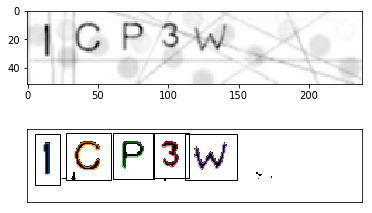

ICP4W.jfif
letters= 5
contours= 7
lst_countours_clean= 5


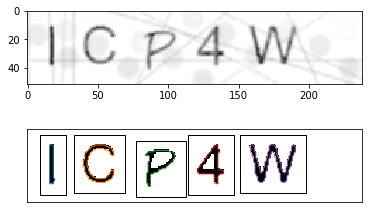

ICPJV.jfif
letters= 5
contours= 8
lst_countours_clean= 5


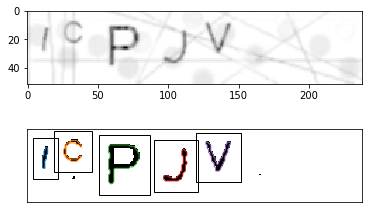

ICPJW.jpg
letters= 5
contours= 8
lst_countours_clean= 5


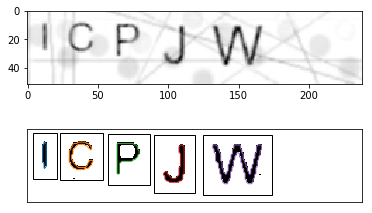

IDPJW.jfif
letters= 5
contours= 8
lst_countours_clean= 5


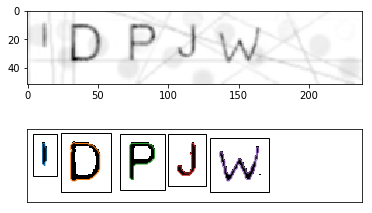

IGANH.png
letters= 5
contours= 7
lst_countours_clean= 5


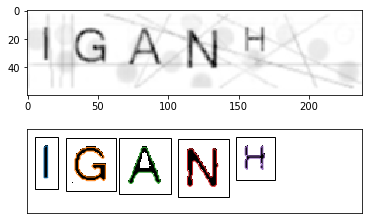

IUP3V.jfif
letters= 5
contours= 9
lst_countours_clean= 5


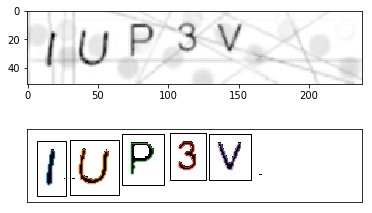

IV930.jfif
letters= 5
contours= 10
lst_countours_clean= 5


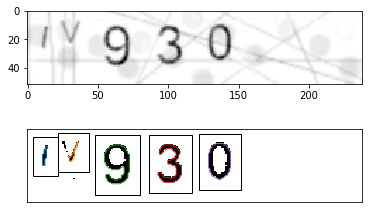

JDQ4X.jfif
letters= 5
contours= 9
lst_countours_clean= 5


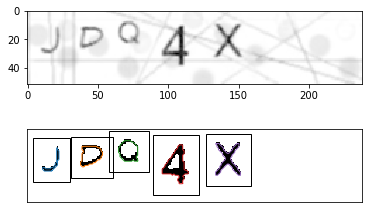

JDQKX.jfif
letters= 5
contours= 9
lst_countours_clean= 5


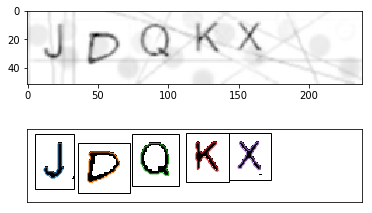

JEQLX.jfif
letters= 5
contours= 7
lst_countours_clean= 5


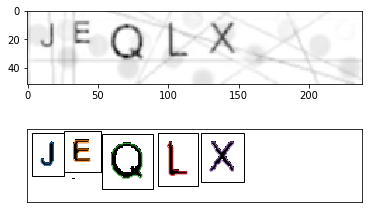

JV04G.jfif
letters= 5
contours= 9
lst_countours_clean= 5


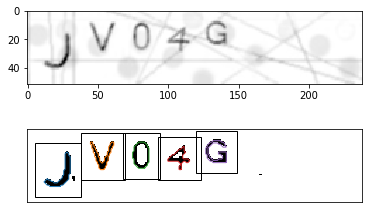

JVO4G.jfif
letters= 5
contours= 9
lst_countours_clean= 5


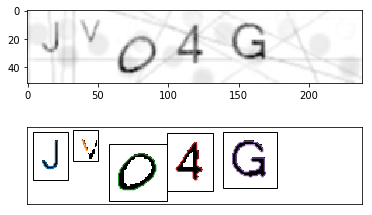

JWO5G.png
letters= 5
contours= 7
lst_countours_clean= 5


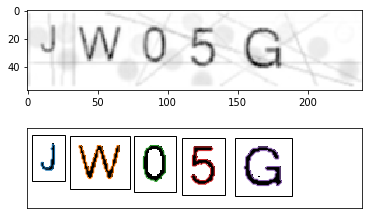

JWQ5X.jfif
letters= 5
contours= 9
lst_countours_clean= 5


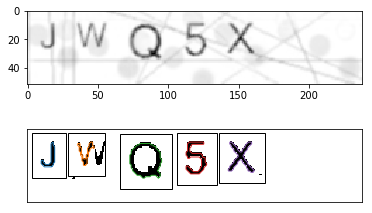

KEQ5X.jpg
letters= 5
contours= 9
lst_countours_clean= 5


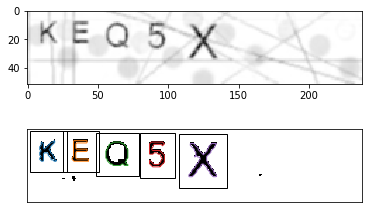

KEQLX.jfif
letters= 5
contours= 7
lst_countours_clean= 5


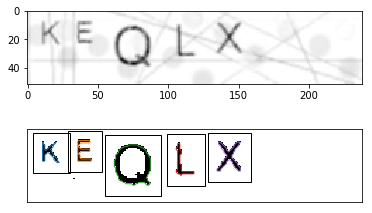

KER5Y.jfif
letters= 5
contours= 7
lst_countours_clean= 5


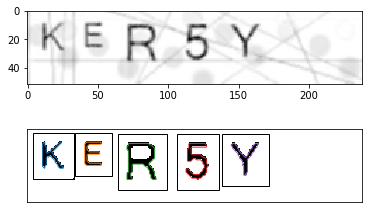

KWA5H.jfif
letters= 5
contours= 6
lst_countours_clean= 5


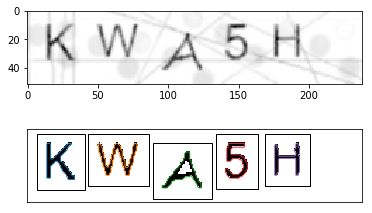

KWR5H.jfif
letters= 5
contours= 6
lst_countours_clean= 5


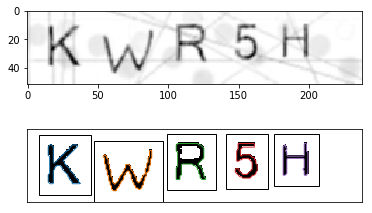

KXB6H.jfif
letters= 5
contours= 9
lst_countours_clean= 5


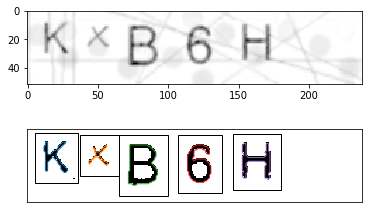

KXR6Y.jfif
letters= 5
contours= 8
lst_countours_clean= 5


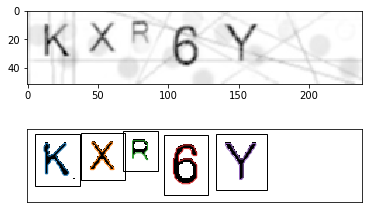

LFS61.jfif
letters= 5
contours= 7
lst_countours_clean= 5


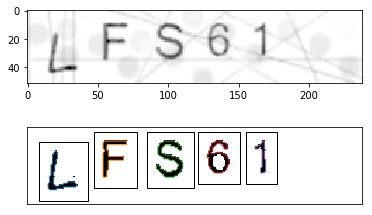

LGSN1.jfif
letters= 5
contours= 5
lst_countours_clean= 5


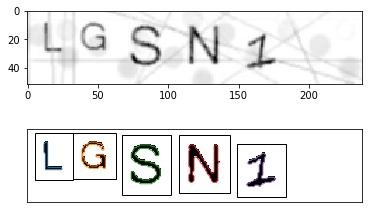

M1D8J.jfif
letters= 5
contours= 8
lst_countours_clean= 5


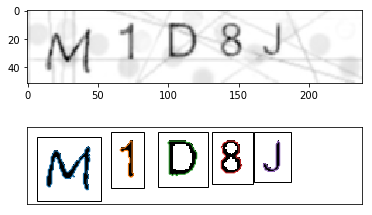

M1T82.jfif
letters= 5
contours= 9
lst_countours_clean= 5


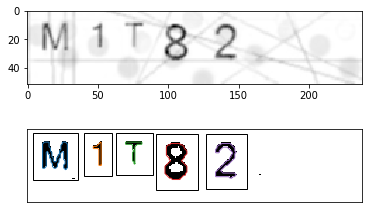

MGT72.jfif
letters= 5
contours= 6
lst_countours_clean= 5


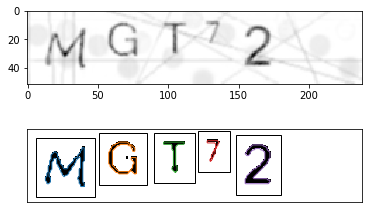

MGT82.jfif
letters= 5
contours= 7
lst_countours_clean= 5


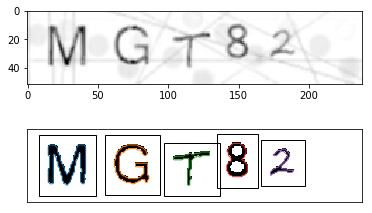

MGTN1.jfif
letters= 5
contours= 8
lst_countours_clean= 5


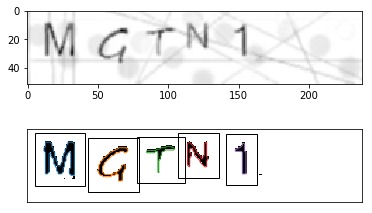

MYT72.jfif
letters= 5
contours= 7
lst_countours_clean= 5


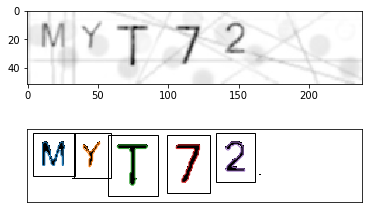

N1ER6.jfif
letters= 5
contours= 13
lst_countours_clean= 5


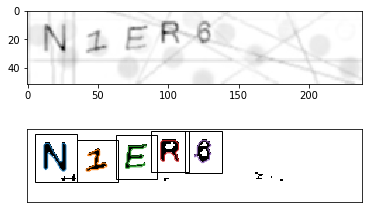

N1ER6.jpg
letters= 5
contours= 10
lst_countours_clean= 5


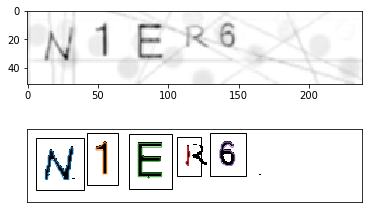

N1T82.jfif
letters= 5
contours= 10
lst_countours_clean= 5


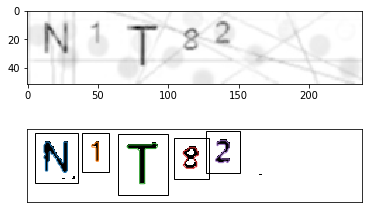

N1T8J.jfif
letters= 5
contours= 8
lst_countours_clean= 5


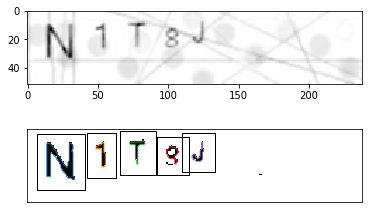

N1U8K.jpg
letters= 5
contours= 9
lst_countours_clean= 5


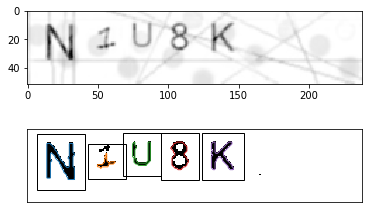

N2D8K.jfif
letters= 5
contours= 10
lst_countours_clean= 5


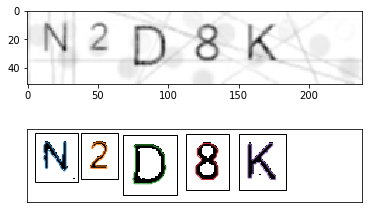

N2D9K.jfif
letters= 5
contours= 8
lst_countours_clean= 5


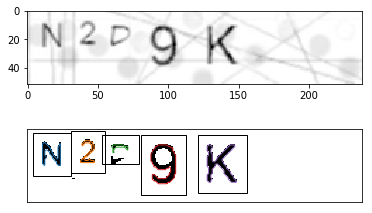

N2U83.jpg
letters= 5
contours= 8
lst_countours_clean= 5


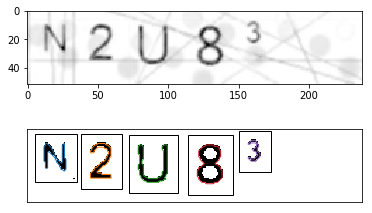

NHT82.jfif
letters= 5
contours= 7
lst_countours_clean= 5


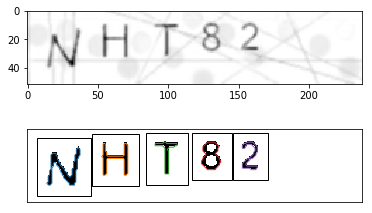

O2E9L.jfif
letters= 5
contours= 8
lst_countours_clean= 5


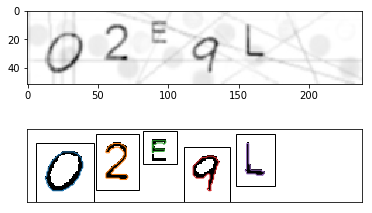

O2V9L.jpg
letters= 5
contours= 14
lst_countours_clean= 5


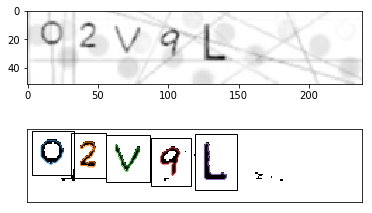

O3V04.jpg
letters= 5
contours= 9
lst_countours_clean= 5


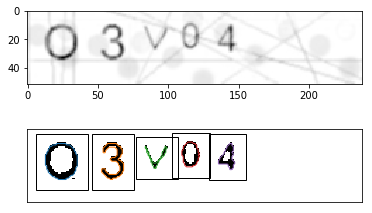

O3V9L.jfif
letters= 5
contours= 8
lst_countours_clean= 5


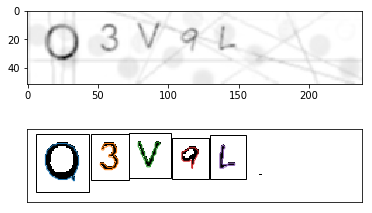

OIV93.jfif
letters= 5
contours= 8
lst_countours_clean= 5


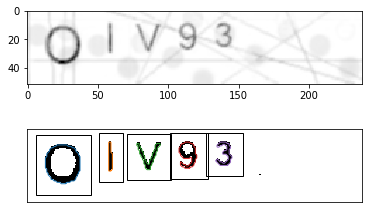

OIV94.jfif
letters= 5
contours= 9
lst_countours_clean= 5


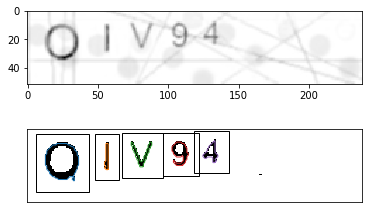

OIV94.jpg
letters= 5
contours= 10
lst_countours_clean= 5


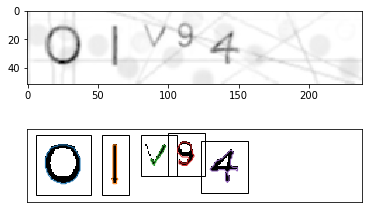

OIVP4.jfif
letters= 5
contours= 10
lst_countours_clean= 5


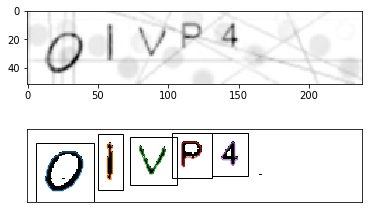

OJVQ4.jfif
letters= 5
contours= 9
lst_countours_clean= 5


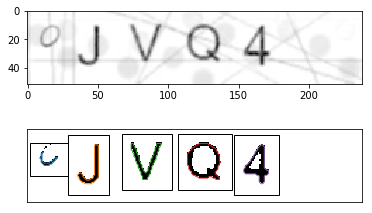

OMGTN.jpg
letters= 5
contours= 11
lst_countours_clean= 5


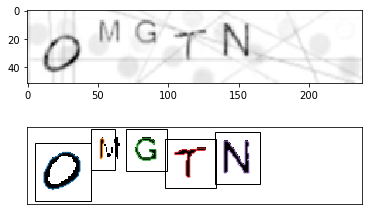

OMYS7.jfif
letters= 5
contours= 9
lst_countours_clean= 5


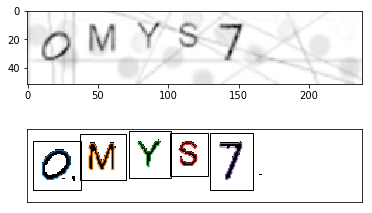

P3V04.jfif
letters= 5
contours= 9
lst_countours_clean= 5


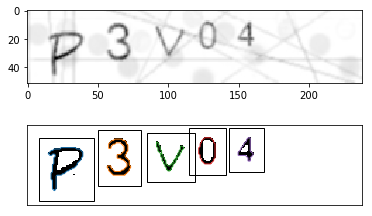

P3V0M.jfif
letters= 5
contours= 8
lst_countours_clean= 5


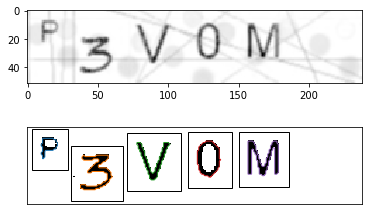

P3W04.jfif
letters= 5
contours= 12
lst_countours_clean= 5


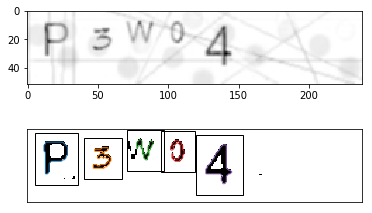

P3W0M.jfif
letters= 5
contours= 12
lst_countours_clean= 5


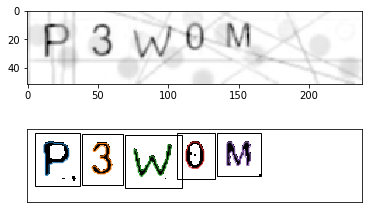

P4WA5.jfif
letters= 5
contours= 8
lst_countours_clean= 5


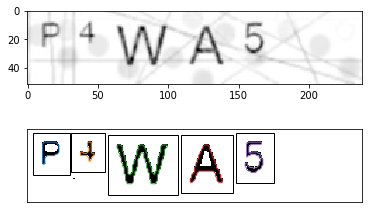

P4WAM.jfif
letters= 5
contours= 10
lst_countours_clean= 5


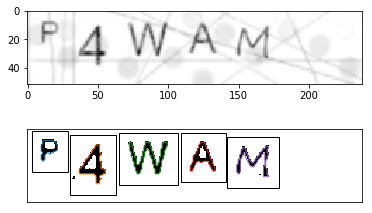

PJVQ4.jfif
letters= 5
contours= 8
lst_countours_clean= 5


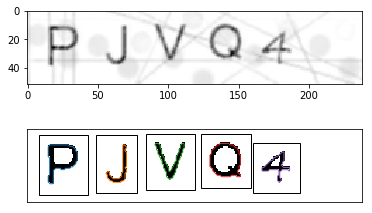

PJW05.jpg
letters= 5
contours= 13
lst_countours_clean= 5


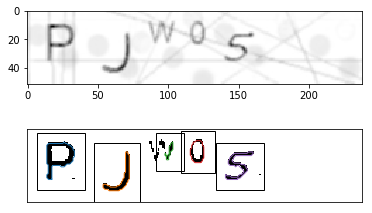

PJWO4.jfif
letters= 5
contours= 16
lst_countours_clean= 5


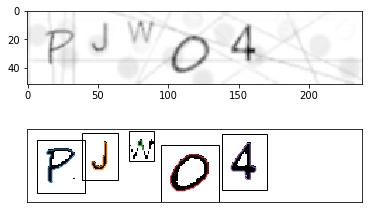

PJWQ5.jfif
letters= 5
contours= 8
lst_countours_clean= 5


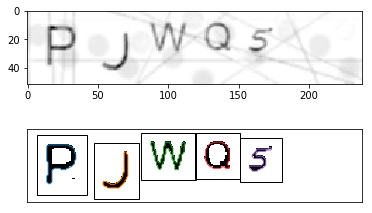

PJWUO.png
letters= 5
contours= 13
lst_countours_clean= 5


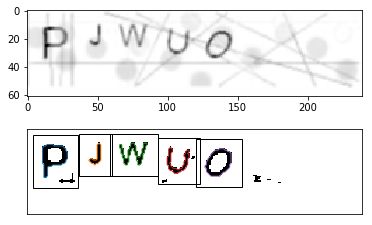

Q4NHT.jfif
letters= 5
contours= 10
lst_countours_clean= 5


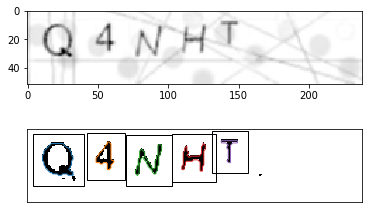

Q4WA5.jfif
letters= 5
contours= 9
lst_countours_clean= 5


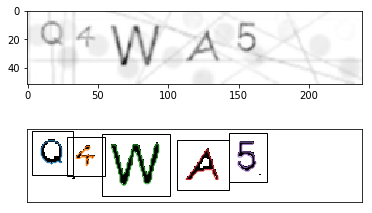

Q4WAN.png
letters= 5
contours= 8
lst_countours_clean= 5


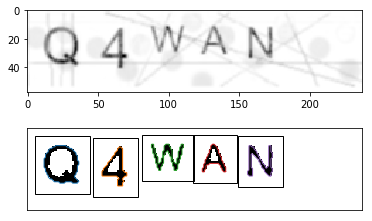

Q5GAN.png
letters= 5
contours= 7
lst_countours_clean= 5


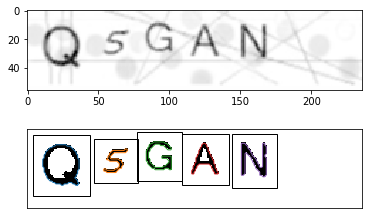

Q5XAN.jfif
letters= 5
contours= 7
lst_countours_clean= 5


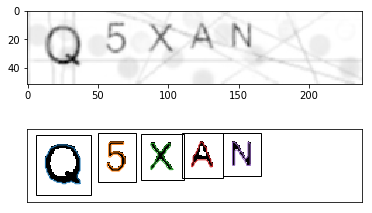

Q5XBN.jfif
letters= 5
contours= 10
lst_countours_clean= 5


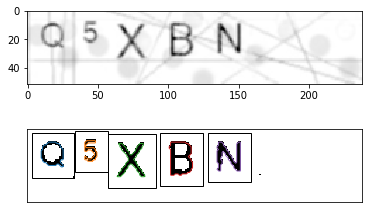

QKWA5.jfif
letters= 5
contours= 8
lst_countours_clean= 5


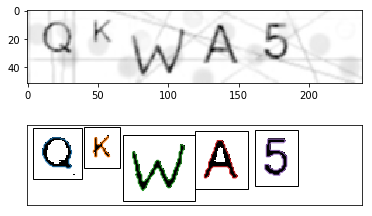

QKXR5.jfif
letters= 5
contours= 7
lst_countours_clean= 5


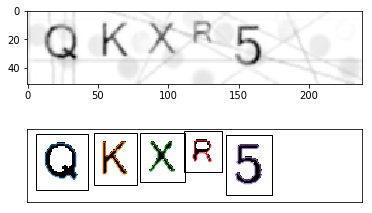

QLXB6.jpg
letters= 5
contours= 11
lst_countours_clean= 5


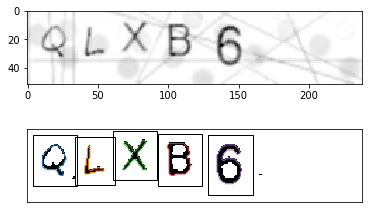

R5XB6.jfif
letters= 5
contours= 11
lst_countours_clean= 5


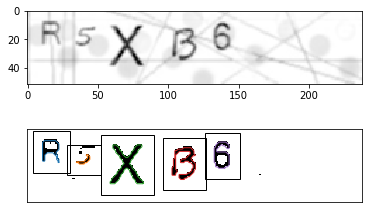

R5XBN.jfif
letters= 5
contours= 7
lst_countours_clean= 5


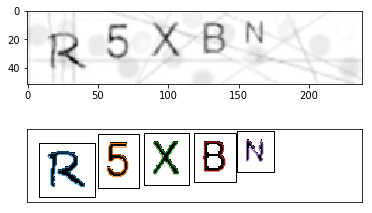

R5XBO.jpg
letters= 5
contours= 7
lst_countours_clean= 5


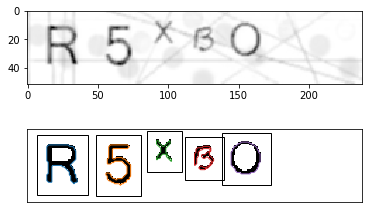

R5YBO.jfif
letters= 5
contours= 11
lst_countours_clean= 5


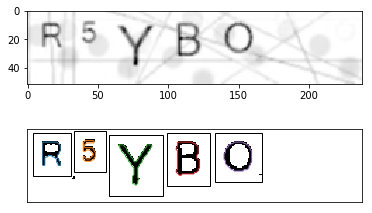

R5YV0.jfif
letters= 5
contours= 10
lst_countours_clean= 5


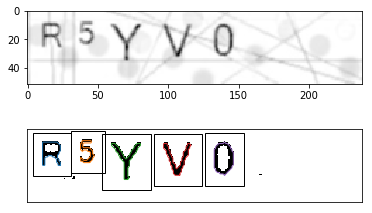

R6HCO.jfif
letters= 5
contours= 9
lst_countours_clean= 5


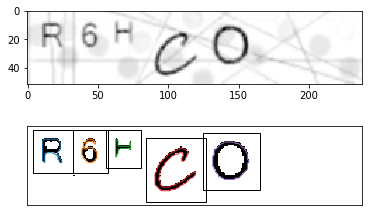

R6YC7.jfif
letters= 5
contours= 11
lst_countours_clean= 5


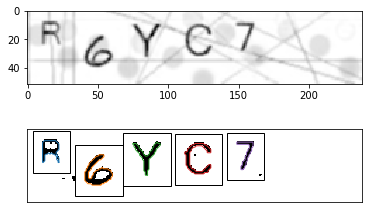

R6YCO.jfif
letters= 5
contours= 10
lst_countours_clean= 5


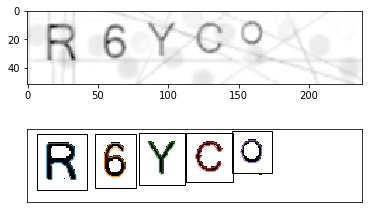

RLXB6.jfif
letters= 5
contours= 10
lst_countours_clean= 5


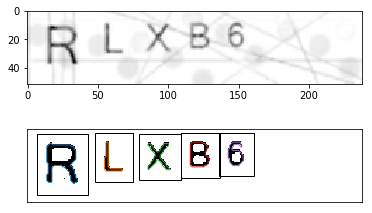

RMYC7.jpg
letters= 5
contours= 6
lst_countours_clean= 5


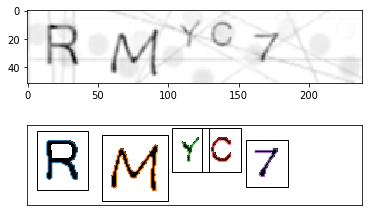

S61CP.jfif
letters= 5
contours= 7
lst_countours_clean= 5


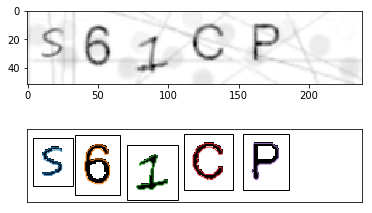

S6ICP.jfif
letters= 5
contours= 11
lst_countours_clean= 5


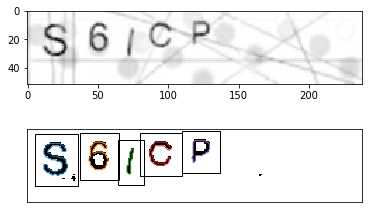

S6ICP.jpg
letters= 5
contours= 9
lst_countours_clean= 5


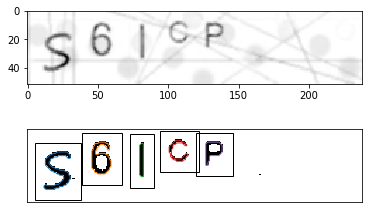

S71CP.jfif
letters= 5
contours= 9
lst_countours_clean= 5


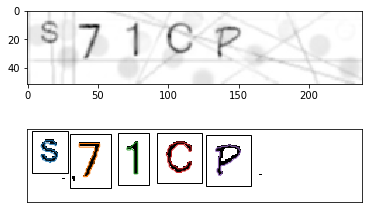

S71DP.jfif
letters= 5
contours= 7
lst_countours_clean= 5


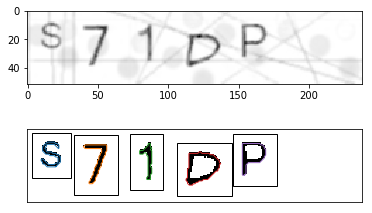

SM1C8.jfif
letters= 5
contours= 8
lst_countours_clean= 5


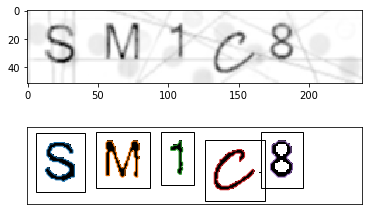

SM1T8.jfif
letters= 5
contours= 8
lst_countours_clean= 5


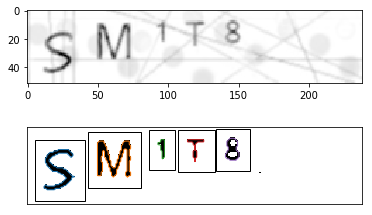

SMYC7.jfif
letters= 5
contours= 7
lst_countours_clean= 5


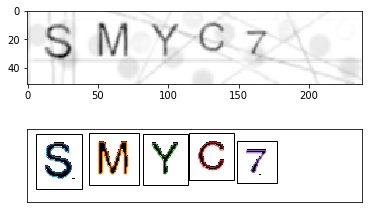

SN1D8.jfif
letters= 5
contours= 8
lst_countours_clean= 5


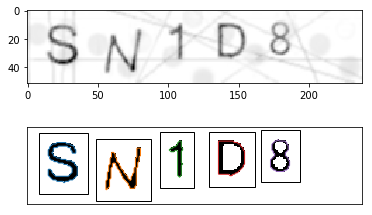

T72DQ.jfif
letters= 5
contours= 9
lst_countours_clean= 5


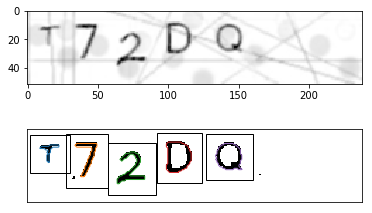

TJDQK.jfif
letters= 5
contours= 13
lst_countours_clean= 5


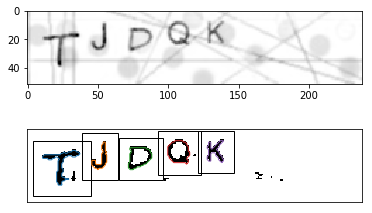

TN1D8.jpg
letters= 5
contours= 11
lst_countours_clean= 5


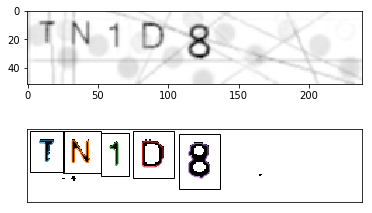

TN2D8.jfif
letters= 5
contours= 11
lst_countours_clean= 5


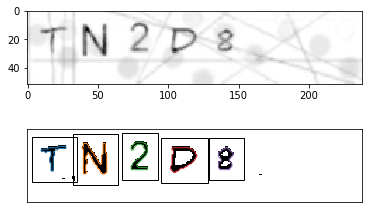

TN2E9.jfif
letters= 5
contours= 7
lst_countours_clean= 5


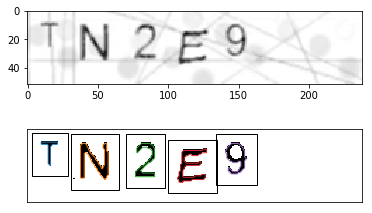

TO2ES.jfif
letters= 5
contours= 8
lst_countours_clean= 5


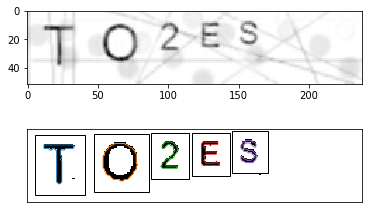

U83EO.jfif
letters= 5
contours= 10
lst_countours_clean= 5


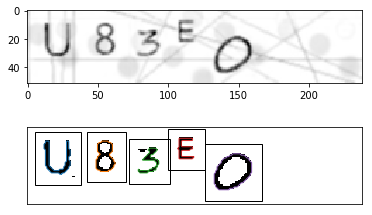

U83ER.jfif
letters= 5
contours= 11
lst_countours_clean= 5


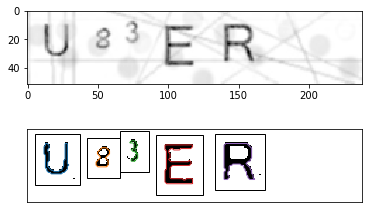

U93FR.jpg
letters= 5
contours= 10
lst_countours_clean= 5


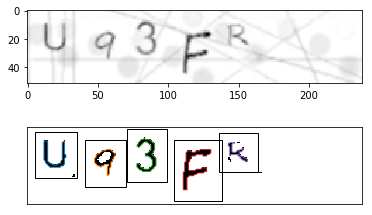

UO2E9.jfif
letters= 5
contours= 9
lst_countours_clean= 5


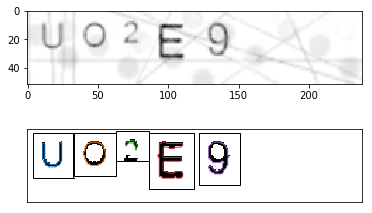

UO2V9.jfif
letters= 5
contours= 9
lst_countours_clean= 5


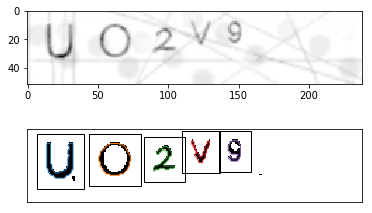

UO3GT.jpg
letters= 5
contours= 8
lst_countours_clean= 5


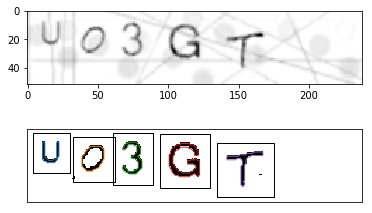

UO3V0.jfif
letters= 5
contours= 8
lst_countours_clean= 5


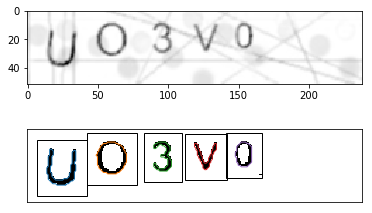

V04GA.jfif
letters= 5
contours= 9
lst_countours_clean= 5


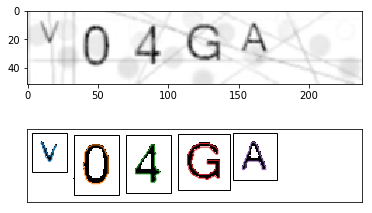

V94F0.jfif
letters= 5
contours= 9
lst_countours_clean= 5


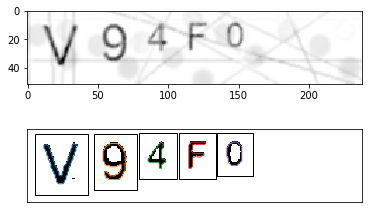

V94FD.jfif
letters= 5
contours= 8
lst_countours_clean= 5


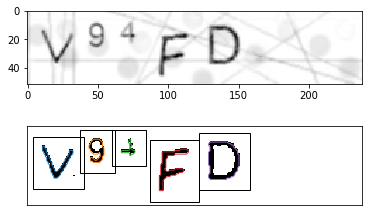

V94FO.png
letters= 5
contours= 9
lst_countours_clean= 5


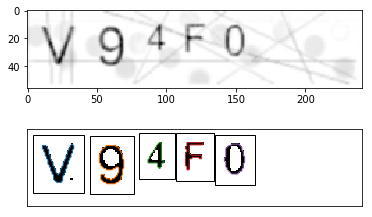

V94FS.jfif
letters= 5
contours= 10
lst_countours_clean= 5


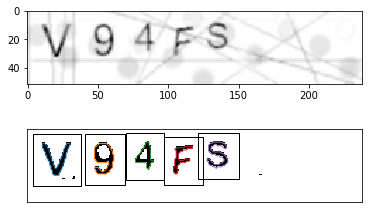

V9LFS.jfif
letters= 5
contours= 8
lst_countours_clean= 5


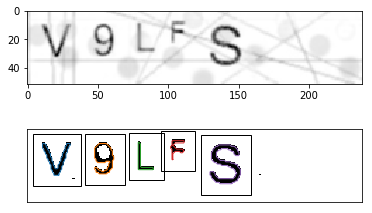

VP4GA.jfif
letters= 5
contours= 10
lst_countours_clean= 5


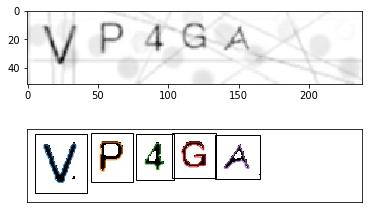

VP4WA.jfif
letters= 5
contours= 14
lst_countours_clean= 5


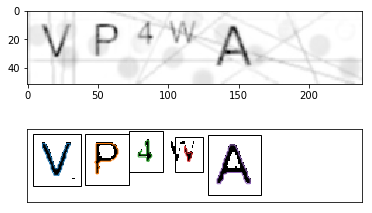

VQ4GA.jfif
letters= 5
contours= 11
lst_countours_clean= 5


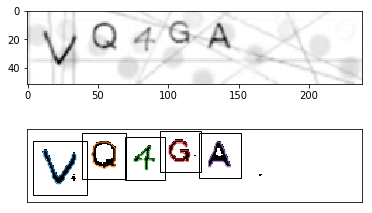

W05GA.jfif
letters= 5
contours= 13
lst_countours_clean= 5


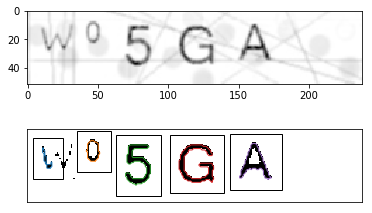

W0MGT.jpg
letters= 5
contours= 9
lst_countours_clean= 5


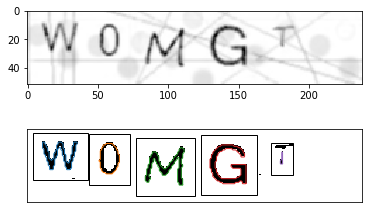

W0N1U.jfif
letters= 5
contours= 7
lst_countours_clean= 5


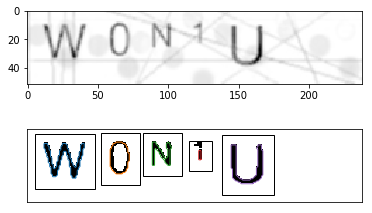

WA5HB.jfif
letters= 5
contours= 12
lst_countours_clean= 5


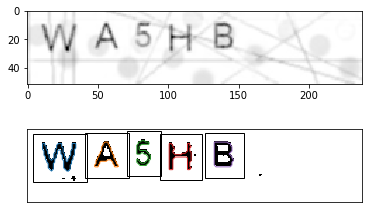

WAMHT.jpg
letters= 5
contours= 11
lst_countours_clean= 5


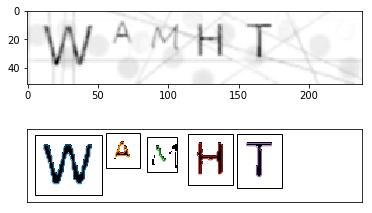

WANHT.jfif
letters= 5
contours= 7
lst_countours_clean= 5


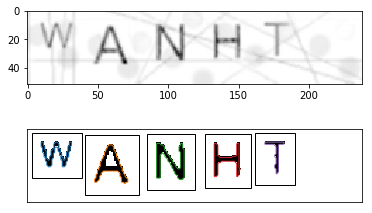

WO4GA.jfif
letters= 5
contours= 13
lst_countours_clean= 5


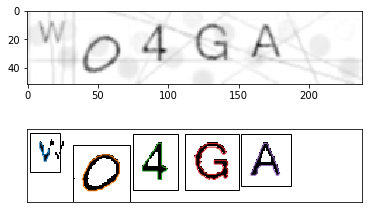

WQ4XA.jfif
letters= 5
contours= 9
lst_countours_clean= 5


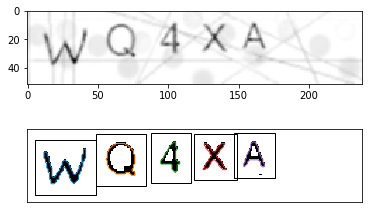

WQ5GA.jfif
letters= 5
contours= 6
lst_countours_clean= 5


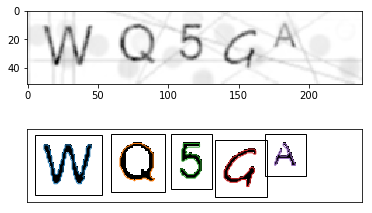

XANHT.png
letters= 5
contours= 8
lst_countours_clean= 5


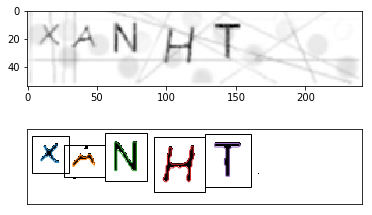

XB6HC.jfif
letters= 5
contours= 6
lst_countours_clean= 5


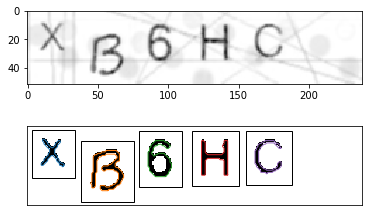

XB6IC.jpg
letters= 5
contours= 10
lst_countours_clean= 5


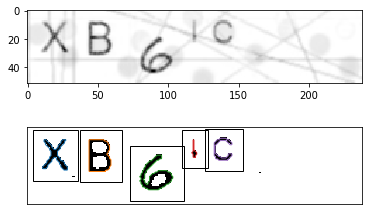

XBOIU.jfif
letters= 5
contours= 8
lst_countours_clean= 5


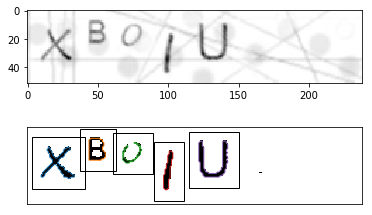

XS6IC.jfif
letters= 5
contours= 6
lst_countours_clean= 5


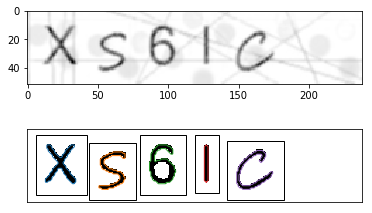

Y7IDP.jfif
letters= 5
contours= 12
lst_countours_clean= 5


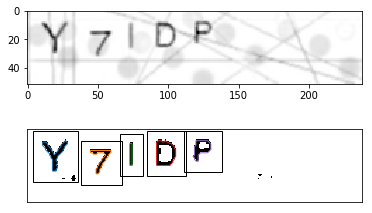

YB7IV.jfif
letters= 5
contours= 10
lst_countours_clean= 5


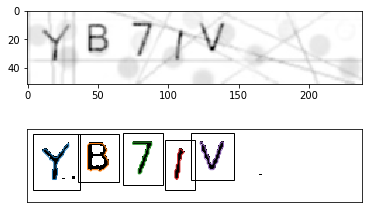

YBOIV.png
letters= 5
contours= 11
lst_countours_clean= 5


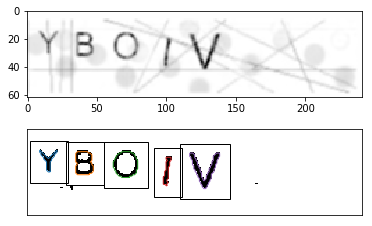

YC7JD.jfif
letters= 5
contours= 7
lst_countours_clean= 5


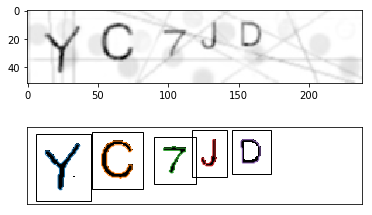

YCPJV.jpg
letters= 5
contours= 14
lst_countours_clean= 5


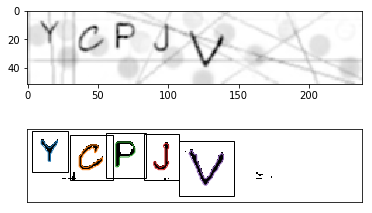

YS61C.jpg
letters= 5
contours= 7
lst_countours_clean= 5


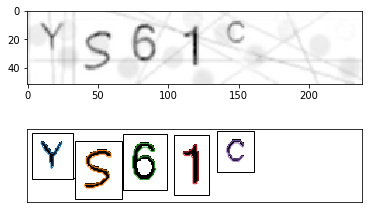

In [15]:
for file_name in onlyfiles:
    print(file_name)

    letters = list(file_name[:file_name.find('.')])
    ln=len(letters)
    print("letters=", ln)

    image = cv2.imread(os.path.join(dir_raw,file_name))
    thresh=4
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #chans = cv2.split(image)[2]**0.3
    chans = cv2.split(image)[2]/255
    normilized = chans**0.3
    normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7

    thresh = threshold_otsu(normilized)
    binary = normilized > thresh
    
    #blurred = cv2.GaussianBlur(chans, (1, 1), 0)
    #blurred = cv2.GaussianBlur(blurred, (3, 3), 0)

    #binaryv = blurred < thresh

    #img=skeletonize(binaryv)
    #img = (img==False).astype(int)

    contours = measure.find_contours(binary, 0.3)
    
    print("contours=", len(contours))
    contours = sorted(contours, key=lambda x: np.min(x[:,0])-np.max(x[:,0]))

    lst=[]
    lst_countours_clean=[]
    for n, contour in enumerate(contours):
        Xmin = int(np.floor(np.min(contour[:,1])))-6
        Xmax = int(np.ceil(np.max(contour[:,1])))+7
        Ymin = int(np.floor(np.min(contour[:,0])))-6
        Ymax = int(np.ceil(np.max(contour[:,0])))+7
        if Xmax-Xmin>5:
            if len(lst)==0:
                lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                lst_countours_clean.append(contour)
            
            elif len(lst)>0 and len(lst)<ln:

                check=[]
                for x in lst:
                    rox = euclidean(np.array([Xmin,Xmax]),x[:2])
                    #rox = np.abs((Xmax-Xmin) - (x[1]-x[0]))
                    check.append(rox)
                min_distance = np.min(np.array(check))
                if min_distance>12:
                    lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                    lst_countours_clean.append(contour)

            else:
                break
                

    lst_countours_clean = sorted(lst_countours_clean, key=lambda x: x[0,1])
    
    print("lst_countours_clean=", len(lst_countours_clean))

    lst = sorted(lst, key=lambda x: x[0])

    #canvas = np.zeros(img.shape)

    fig, ax = plt.subplots(2,1)
    
    
    ax[0].imshow(normilized, interpolation='nearest', cmap=plt.cm.gray)

    ax[1].imshow(binary, interpolation='nearest', cmap=plt.cm.gray)

    for i, contour in enumerate(lst_countours_clean):

            # Get the rectangle that contains the contour
            Xmin = lst[i][0]
            Xmax = lst[i][1]
            Ymin = lst[i][2]
            Ymax = lst[i][3]

            #canvas[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

            tmp = normilized[Ymin:Ymax, Xmin:Xmax]
            
            #tmp = dilation(tmp, [[1,1],[1,1]])
            #tmp = thin(tmp)
            #tmp = dilation(tmp, [[1,1],[1,1]])
            plt.imsave(os.path.join(dir_parts,'t_{}_{}.jpg'.format(letters[i],uuid.uuid4())), tmp , cmap = plt.cm.gray)

            rect = Rectangle((Xmin,Ymin ), Xmax-Xmin, Ymax-Ymin, fill=False)
            ax[1].add_patch(rect)

            ax[1].plot(contour[:, 1], contour[:, 0], linewidth=1)


    ax[1].axis('image')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()

In [16]:
res_files = [f for f in listdir(dir_parts) if isfile(join(dir_parts, f))]

In [17]:
len(res_files)

1445

In [57]:
import cv2
import imutils
import matplotlib.pyplot as plt
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, binary_dilation, square
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from matplotlib.patches import Rectangle
from skimage import measure
import numpy as np
from skimage.morphology import skeletonize, thin
from scipy.spatial.distance import euclidean
from os import listdir
from os.path import isfile, join
import os
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage.filters import threshold_otsu
from skimage import feature
import uuid

def process_and_cut(image):

    image = cv2.imread(image)
    thresh=4
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #chans = cv2.split(image)[2]**0.3
    chans = cv2.split(image)[2]/255
    normilized = chans**0.3
    normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7

    thresh = threshold_otsu(normilized)
    binary = normilized > thresh
    
    #blurred = cv2.GaussianBlur(chans, (1, 1), 0)
    #blurred = cv2.GaussianBlur(blurred, (3, 3), 0)

    #binaryv = blurred < thresh

    #img=skeletonize(binaryv)
    #img = (img==False).astype(int)

    contours = measure.find_contours(binary, 0.3)
    
    print("contours=", len(contours))
    contours = sorted(contours, key=lambda x: np.min(x[:,0])-np.max(x[:,0]))

    lst=[]
    lst_countours_clean=[]
    for n, contour in enumerate(contours):
        Xmin = int(np.floor(np.min(contour[:,1])))-6
        Xmax = int(np.ceil(np.max(contour[:,1])))+7
        Ymin = int(np.floor(np.min(contour[:,0])))-6
        Ymax = int(np.ceil(np.max(contour[:,0])))+7
        if Xmax-Xmin>5:
            if len(lst)==0:
                lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                lst_countours_clean.append(contour)
            
            elif len(lst)>0 and len(lst)<ln:

                check=[]
                for x in lst:
                    rox = euclidean(np.array([Xmin,Xmax]),x[:2])
                    #rox = np.abs((Xmax-Xmin) - (x[1]-x[0]))
                    check.append(rox)
                min_distance = np.min(np.array(check))
                if min_distance>12:
                    lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                    lst_countours_clean.append(contour)

            else:
                break
                

    lst_countours_clean = sorted(lst_countours_clean, key=lambda x: x[0,1])
    
    print("lst_countours_clean=", len(lst_countours_clean))

    lst = sorted(lst, key=lambda x: x[0])   

    lst_images = []
    lst_ids=[]
    for i, contour in enumerate(lst_countours_clean):

            # Get the rectangle that contains the contour
            Xmin = lst[i][0]
            Xmax = lst[i][1]
            Ymin = lst[i][2]
            Ymax = lst[i][3]

            #canvas[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1
            min_el = np.min(normilized)
            max_el = np.max(normilized)
            alfa = 255/(max_el - min_el)
            beta = -min_el * alfa
            print("shape", normilized.shape)
            print(normilized)
            
            print("after stretching")
            
            normilized = np.round(alfa * normilized + beta)
            print("shape", normilized.shape)
            print(normilized)
            print(np.min(normilized), np.max(normilized))
            tmp = normilized[Ymin:Ymax, Xmin:Xmax]
            
            lst_images.append(tmp)
            lst_ids.append(i)
            #tmp = dilation(tmp, [[1,1],[1,1]])
            #tmp = thin(tmp)
            #tmp = dilation(tmp, [[1,1],[1,1]])
            #plt.imsave(os.path.join(dir_parts,'t_{}_{}.jpg'.format(letters[i],uuid.uuid4())), tmp , cmap = plt.cm.gray)

    return np.array(lst_ids), np.array(lst_images)  #numpy array of numpy image parts arrays

In [30]:
img_np = cv2.imread(r'D:\imageRecognition\fecredit\image parts\t_C_b846d9f4-ad03-4853-87d5-1145d4166489.jpg')

In [43]:
np.min(img_np)

0

In [44]:
np.min(img_np[:,:,0])

0

In [45]:
np.min(img_np[:,:,1])

0

In [46]:
np.min(img_np[:,:,2])

0

In [41]:
img_np.shape

(32, 26, 3)

In [60]:
im

array([array([[241., 241., 241., ..., 255., 255., 255.],
       [237., 237., 237., ..., 255., 255., 255.],
       [236., 235., 235., ..., 255., 255., 254.],
       ...,
       [254., 255., 255., ..., 255., 255., 255.],
       [254., 254., 254., ..., 255., 255., 255.],
       [254., 254., 254., ..., 255., 255., 255.]]),
       array([[254., 254., 254., ..., 242., 241., 243.],
       [254., 254., 254., ..., 233., 231., 233.],
       [253., 253., 253., ..., 241., 238., 237.],
       ...,
       [255., 255., 255., ..., 231., 228., 228.],
       [255., 255., 255., ..., 231., 228., 227.],
       [255., 255., 255., ..., 231., 228., 227.]]),
       array([[251., 250., 246., ..., 249., 243., 242.],
       [252., 252., 252., ..., 248., 243., 242.],
       [247., 249., 251., ..., 248., 243., 242.],
       ...,
       [249., 249., 240., ..., 255., 255., 255.],
       [248., 245., 238., ..., 255., 255., 255.],
       [246., 240., 238., ..., 255., 255., 255.]]),
       array([[247., 247., 245., ...,

In [58]:
l, im = process_and_cut(r'D:\imageRecognition\fecredit\fecredit\5HBN2.jpg')

contours= 7
lst_countours_clean= 5
shape (52, 238)
[[0.91059129 0.90993371 0.95329358 ... 0.992056   0.99300839 0.99353699]
 [0.90680892 0.90592929 0.95031563 ... 0.99363499 0.994738   0.99531476]
 [0.90157837 0.90041393 0.94607834 ... 0.99584334 0.99719798 0.99792593]
 ...
 [0.91303476 0.91217118 0.95503767 ... 0.98651148 0.97510809 0.96839665]
 [0.91303476 0.91217118 0.95503767 ... 0.99608687 0.99744741 0.99812255]
 [0.91303476 0.91217118 0.95503767 ... 0.99583419 0.99592716 0.99665711]]
after stretching
shape (52, 238)
[[230. 230. 242. ... 253. 253. 253.]
 [229. 228. 241. ... 253. 254. 254.]
 [227. 227. 240. ... 254. 254. 254.]
 ...
 [230. 230. 242. ... 251. 248. 246.]
 [230. 230. 242. ... 254. 254. 254.]
 [230. 230. 242. ... 254. 254. 254.]]
0.0 255.0
shape (52, 238)
[[230. 230. 242. ... 253. 253. 253.]
 [229. 228. 241. ... 253. 254. 254.]
 [227. 227. 240. ... 254. 254. 254.]
 ...
 [230. 230. 242. ... 251. 248. 246.]
 [230. 230. 242. ... 254. 254. 254.]
 [230. 230. 242. ... 254. 25

In [1]:
np.sqrt(0.1)

NameError: name 'np' is not defined

In [64]:
im.shape

(5,)

In [65]:
len(im)

5

In [5]:
import json

In [1]:
dct = {'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x96\x00\x00\x00#\x08\x06\x00\x00\x00v\x06\xf3$\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x04\xbcIDATx^\xed\\\xd1r\xdb0\x0c\xebg\xe71\xff\x98\x0f\xca\xce\xdd\xb1e\x19\x82\x00e\xd9\xae\x1b\xef\xae\xb7\xae\x96d\t\x04AP\xcd\xed\xe3\xf1x<\xed\xcf\xf2\xbd}\xf9\x9f}\rH\xbe\xf1\xf3\xb3q\xd7\xf3o|\x11>\x11s?n\r~\xf7\xfb\xfd\xe9\xbf\xf6\x8c\xcfG|\xd9\x9a\x83,km5\xdf\xd6U\xd6\xbf\xddn\xcf\xe5\x8b\x01\x99\x8dQ\xd6\x9f\x9dh1\xb9+\x1c\xe3\xfe"y\xb6 \x92\xc7I\xc5\xe7\x93X\xea`\x04\xe8\x1e\xf3YVW{\x88\xcf\xd8\xbf\x8fN\xb6X9<Y\x96g\x91<{\xe0\xdfM\xa6\x17\xc5RK`\xa5\n\xa3d\xb553\x12Ud\xe8\x94\xf0l,S6\xff\xdc\x82:;\x98Qy<\x812\xab2\xfb\xfd\xb3\x93\xe9\x07\xb1\xd4\xcd\xa2\xe0\xa8\xf3+\xe5\xab\x02\xcfTI}\x7fVzP2(>EMFV\xb6\x94\xfd3\x0c\xba\xca2\xcb\xcfE\xfc\xa0b!\xa0}\xe0\x15 F\x0ej\xeb\xceZ\x1f\xa9kF\xe2.\x91F<\xcf\xec\xf3\x1diQ\xd0\xbb\xbf\x88\xd5\t\xa2/Ug\x07)\xf3,\xac4\xfarhX\xd8\xcfX\x90\xbbj\x7fV|S\xc5RI\xd6\x01)\x96\x9f\xa3$]Q$\xdb\x1b*]\xa8\x94\xaa%q\x0b|\xb7*i,\xc9\xd0\xf3\x0f\xf5\x90,\x13\xab\xe7V\x8a\x94\xbf\x91\x89\xcc\xe6f\xe5:\x1bg\x04Q\xde\xef\xc7(MH\xb5f6?\xe2\xbd\x07\xfe#vdm\x92\xecv\x8f\xd5\t*\x02"\xae\x11\xc7!\xf2\xad!V\x87\xe8\xe8\x8cYW\x87\x14\xe6\xaf\x10m\xfa=V\x06\xcc\xf2\xb3\x0e\xb1\xe2\xc5\xa5\xad\x89\x88\xb5\x10\xa7R*4\x9f\xed)\xcbZ6\'{^\x95Nd\'~[i\xeb\xaa\xde\xf0=\x16"\x10\x02\n\xa9\x89m\x98=_\xc6\xc51\xde\x03\xc5g\xbe\xc1@>\xc0\x9fAy\x7f\xb6\x07E]\x99OAXV\xe4\xfa\xed\xca&\xdfcejQeg<x\xb7\x8ce\xc6\x19\xad\x81\xf6\x11\xc9\x955\x10HM32\xb03d\xc1\xf6\xea;J\x86\x98\xach\x1dt\xad\xb2\xd6/\x8d\xcc\x97\xef\xb1\xba% \x06\xb5R\x9b\xac\x94e\xbf\xf3\xcaT\xa9R\x1a5\x90h\r\xa6h{\x06\xd2\xf6\xe2I\x965\x02\x1ew\xf5\xfck\x1a34W\xbe\xc7\xaa\xd4\x89\xf9\n\xe4\x81\x98\xd9\x8d\xa5@Q\xcd.H\n\xa9\xac\xbb\xf3c\x91\xa9\xef\xbe\xbf\xab\x06\xc8jx\xe2\xb1\xd2\xbb\xc7\xf3\xd6=\x16\xf31U\xa9\xe8*^l\xd5\xd5\x06 \xce\xab@\xacH\xc5\x14W\xe9H\x91\xa21Ou\xa4\xd2t\xf0\xab\x92\xe8\xe5\x1e+JmU\x0e\x14\xf0\x971]\xc5\xb2\x80\xb0\xf5\x15\xc5c~\x04\xa9PT\x80*12S_\xa9[T\xe2L\x85\xcc\x9b\x9d\x95d\x9f\xc4B\xa6\x96\x05V1\xb8\x0b\xa9P\xe7\xa7\xcc\xf7c\x90\xc2T>\x0b\x95,\xa4\xaeU G\x15\xb9\xea\xeeb)<+\x91\xe29^\x88\x95\x81`\x87e\xc1`~\x85\xcd\xcf2\xdfK\xf3(\xb1b\xb0:D\xac\xde\x8f\xfcQf\x19P\xd9\xf0\xeb3\xff\xb4\xb5\x7f\xab\x12]\xd9\xbf\x1f\xd3\xba\xc7\xaa2\x16\x91\xa2R\x9c\xaebU\xefP\xc9\x82\x1a\x8d\xac\xc3R\xf7\xc7\x88[\xf9<\xa4\xa8[(\x97\x95\xd7\xae\x8f\xf2\xf3P2\xc5s\xc8\xf7X\x8c8J`\xbb\x06>\x1e(3\xf0J\xa9D\xa5X\xdd\x8f\x07\xb3\x9ac\x8a\x93%`\xb4\x15\x1d\xb2\xa9\xc1\xdc\x82\x8cJ\x19\xcf\xf6W\xfe\xae\x90e"\x0b\xcc\xec\xf9\x8c\xdc\xd9sON\xb6_\xa5\x19@\xefP\x08W\xa9"\xeb\x14\xcfF\xc4\x1f\xf7X\xa8\xc63\x9f\xa3\xa8U\xa66J0b6 \xffRu\xaf\xcb\x9c\xee\xfbcW\xd7\xe9.\xe3\\Vz*\xdc\xcf\xa8V\xcb\x9eS\xc5\x1a\xed\x8cf\x82P\xed!^\x05 \x9f\x82\x0c\xe7\xac\x92\xd15\xdb\xd5\xbecgn\xe4<\x9bRY\x12\xb5?\x8f5\xda\xf1\xa8AVM\xf4L\x12\xa3\xbd1\xa5\xc9\x9eG\xb2y2e>k\x16\xc9U|\xf7JB\xe9\xf3X>{Xg\xa8\x02\x85<\x053\xb9\xea\xfa3\x81\x8ej\xc2\x88\x88\xf6\xc8\xcef%\x9b\xad_\x9d\xed\x08|2\x83\xdf\xfe<\x16\xeax:`\xa0\xacF\n\xc1\x02\xb2%\x98k\xfc\x8f5\x0e\xdd\xfd\xc52\xa8\xcc\xefb:\xda\xed\xa9\xa5\xb9u\x8f\xb5\xf5f\xd0\xfaYp\x15\xb0;d\xafJ\x04R\xd7Y\xeb+\xc1R\xc8\xc6\xcan\x15\xbf\xecjg\xcd\xf9Z\xf7X{\x063\x0b\xf4\x91\xef\x1f\xf1[\xb3\x83\xd59\xff\xd1\xc9 \x7f\x1eK\xc9\xaa\xbd\x8c\xe1o5\xee\xd7\xf9\xbf\x11\x90?\x8f\xd5\xc9\x96\x8b\x84\xaf\x08\xbc\x1b~\xad\xcfc]J\xf1\x1f\x81w#IL\x93\xecw\x87\xd1\xbf\xb5\xef\xb1.\xb9\xff\x89\xc0\xbb\x93\x0c\x9d_\xba\xc7:\xaa\x1b\xbcJ\xeayKj\xfb\x1e\xeb\xaf\x04\xdb\xb7\xef\x97\xea\xf0\xffu\xb0{\xf5\xf0\x0f\x9a@^\'B\xce\xf4J\x00\x00\x00\x00IEND\xaeB`\x82'}

In [6]:
res = json.dumps(dct)

TypeError: Object of type 'bytes' is not JSON serializable

In [3]:
dct['image']

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x96\x00\x00\x00#\x08\x06\x00\x00\x00v\x06\xf3$\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x04\xbcIDATx^\xed\\\xd1r\xdb0\x0c\xebg\xe71\xff\x98\x0f\xca\xce\xdd\xb1e\x19\x82\x00e\xd9\xae\x1b\xef\xae\xb7\xae\x96d\t\x04AP\xcd\xed\xe3\xf1x<\xed\xcf\xf2\xbd}\xf9\x9f}\rH\xbe\xf1\xf3\xb3q\xd7\xf3o|\x11>\x11s?n\r~\xf7\xfb\xfd\xe9\xbf\xf6\x8c\xcfG|\xd9\x9a\x83,km5\xdf\xd6U\xd6\xbf\xddn\xcf\xe5\x8b\x01\x99\x8dQ\xd6\x9f\x9dh1\xb9+\x1c\xe3\xfe"y\xb6 \x92\xc7I\xc5\xe7\x93X\xea`\x04\xe8\x1e\xf3YVW{\x88\xcf\xd8\xbf\x8fN\xb6X9<Y\x96g\x91<{\xe0\xdfM\xa6\x17\xc5RK`\xa5\n\xa3d\xb553\x12Ud\xe8\x94\xf0l,S6\xff\xdc\x82:;\x98Qy<\x812\xab2\xfb\xfd\xb3\x93\xe9\x07\xb1\xd4\xcd\xa2\xe0\xa8\xf3+\xe5\xab\x02\xcfTI}\x7fVzP2(>EMFV\xb6\x94\xfd3\x0c\xba\xca2\xcb\xcfE\xfc\xa0b!\xa0}\xe0\x15 F\x0ej\xeb\xceZ\x1f\xa9kF\xe2.\x91F<\xcf\xec\xf3\x1diQ\xd0\xbb\xbf

In [4]:
image = dct["image"].read()

AttributeError: 'bytes' object has no attribute 'read'

In [10]:
import cv2

In [8]:
import numpy as np

In [9]:
img_array = np.asarray(bytearray(dct['image']), dtype=np.uint8)

In [11]:
image = cv2.imdecode(img_array,3)

In [12]:
image

array([[[211, 211, 211],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [211, 211, 211],
        [255, 255, 255]],

       [[255, 255, 255],
        [211, 211, 211],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[211, 211, 211],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [211, 211, 211],
        [255, 255, 255]],

       [[255, 255, 255],
        [211, 211, 211],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
img_array = np.asarray(bytearray(image), dtype=np.uint8)

image = cv2.imdecode(img_array,3)